# 1. Biblioteki

In [2]:
library(dplyr)
library(Metrics)
library(FactoMineR)
library(factoextra)
library(tidyverse)
library(mlbench)
library(caret)
library(MASS)
library(randomForest)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'FactoMineR' was built under R version 4.0.5"
Warning message:
"package 'factoextra' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.0     v purrr   0.3.4
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'readr' was built under R version 4.0.5"
Warning message:
"package 'stringr' was built under R version 4.0.5"
Warning message:
"package 'fo

# 2. Wczytuje dane

In [3]:
# Train to zbiór do uczenia
train_df=read.csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv", encoding="utf-8")

# Test miał na celu porównanie poprawnośći predykcji na zbiorze, którego nie
# nie "widział" model podczas uczenia
test_df=read.csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv", encoding="utf-8")

# Val, odpowiadał za naprowadzanie modelu podczas walidacji w procesie uczenia
val_df=read.csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv", encoding="utf-8")


colnames(train_df)<-c('id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria')
colnames(test_df)<-c('id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria')
colnames(val_df)<-c('id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria')


In [4]:
head(train_df)

,id,Województwo,Data urodzenia,IE,Dokł. IE,PF,PI-PROD,PI-POKR,Prc,Psm,...,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og,kategoria
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1842,WIELKOPOLSKIE,2020,2120,66,142,137,127,121,113,...,577,2,452,1,115,114,109,127,123,krowa
2,1464,KUJAWSKO-POMORSKIE,2018,1912,70,137,126,123,109,113,...,358,-16,354,-4,115,113,104,123,123,jalowka
3,813,POMORSKIE,2020,2126,66,136,126,120,110,107,...,368,-4,350,4,104,103,102,122,117,krowa
4,961,KUJAWSKO-POMORSKIE,2020,2089,68,136,133,111,104,110,...,546,12,410,7,106,106,101,112,112,krowa
5,6,ZACHODNIOPOMORSKIE,2020,2853,66,143,125,115,91,95,...,501,36,289,15,102,102,118,123,109,jalowka
6,974,PODLASKIE,2020,2088,66,141,135,115,111,112,...,554,13,433,10,111,107,103,117,118,krowa


## 2.1 Poprawiam nazwy zmiennych

In [5]:
colnames(train_df)

[1] "id"             "Województwo"    "Data urodzenia" "IE"            
 [5] "Dokł. IE"       "PF"             "PI-PROD"        "PI-POKR"       
 [9] "Prc"            "Psm"            "Pnr"            "Pw"            
[13] "PI-PLOD"        "CRj"            "CRk"            "PP"            
[17] "OMC"            "WH-KSOM"        "WH-DLUG"        "IP"            
[21] "kg ml"          "kg tł"          "% tł"           "kg bi"         
[25] "% bi"           "rc"             "sm"             "nr"            
[29] "w"              "og"             "kategoria"

In [6]:
str(train_df)

'data.frame':	1504 obs. of  31 variables:
 $ id            : int  1842 1464 813 961 6 974 647 1096 631 335 ...
 $ Województwo   : chr  "WIELKOPOLSKIE" "KUJAWSKO-POMORSKIE" "POMORSKIE" "KUJAWSKO-POMORSKIE" ...
 $ Data urodzenia: int  2020 2018 2020 2020 2020 2020 2020 2019 2020 2020 ...
 $ IE            : int  2120 1912 2126 2089 2853 2088 2173 2139 2178 2303 ...
 $ Dokł. IE      : int  66 70 66 68 66 66 66 68 66 65 ...
 $ PF            : int  142 137 136 136 143 141 140 138 136 149 ...
 $ PI-PROD       : int  137 126 126 133 125 135 138 122 129 145 ...
 $ PI-POKR       : int  127 123 120 111 115 115 121 120 118 127 ...
 $ Prc           : int  121 109 110 104 91 111 109 116 102 121 ...
 $ Psm           : int  113 113 107 110 95 112 105 110 112 124 ...
 $ Pnr           : int  106 103 102 99 101 99 108 113 96 110 ...
 $ Pw            : int  128 128 124 114 124 118 123 116 125 124 ...
 $ PI-PLOD       : int  109 114 113 114 134 122 99 128 110 106 ...
 $ CRj           : int  107 114 112 113

### 2.2 Usuwam niepotrzebne do IE kolumny i zakodowuje Date urodzenia jako zmienną kategoryczna

In [7]:
train_df$id<-NULL
test_df$id<-NULL
val_df$id<-NULL

train_df$kategoria<-NULL
test_df$kategoria<-NULL
val_df$kategoria<-NULL


train_df$'PF'<-NULL
test_df$'PF'<-NULL
val_df$'PF'<-NULL


train_df$'Dokł. IE'<-NULL
test_df$'Dokł. IE'<-NULL
val_df$'Dokł. IE'<-NULL


train_df$'Data urodzenia'<-as.character(train_df$'Data urodzenia')
test_df$'Data urodzenia'<-as.character(test_df$'Data urodzenia')
val_df$'Data urodzenia'<-as.character(val_df$'Data urodzenia')

In [8]:
str(train_df)

'data.frame':	1504 obs. of  27 variables:
 $ Województwo   : chr  "WIELKOPOLSKIE" "KUJAWSKO-POMORSKIE" "POMORSKIE" "KUJAWSKO-POMORSKIE" ...
 $ Data urodzenia: chr  "2020" "2018" "2020" "2020" ...
 $ IE            : int  2120 1912 2126 2089 2853 2088 2173 2139 2178 2303 ...
 $ PI-PROD       : int  137 126 126 133 125 135 138 122 129 145 ...
 $ PI-POKR       : int  127 123 120 111 115 115 121 120 118 127 ...
 $ Prc           : int  121 109 110 104 91 111 109 116 102 121 ...
 $ Psm           : int  113 113 107 110 95 112 105 110 112 124 ...
 $ Pnr           : int  106 103 102 99 101 99 108 113 96 110 ...
 $ Pw            : int  128 128 124 114 124 118 123 116 125 124 ...
 $ PI-PLOD       : int  109 114 113 114 134 122 99 128 110 106 ...
 $ CRj           : int  107 114 112 113 129 124 98 120 107 106 ...
 $ CRk           : int  110 113 117 126 133 119 107 135 113 113 ...
 $ PP            : int  101 94 94 89 102 80 107 110 105 97 ...
 $ OMC           : int  105 98 100 100 113 93 107 121 107 

In [9]:
cale_train=rbind(train_df,test_df,val_df)
dim(cale_train)

[1] 1881   27

In [10]:
table(cale_train$'Data urodzenia')


2015 2016 2017 2018 2019 2020 2021 
   1   23   68  279  397 1066   47 

Usuwam wpis z rokiem 2015 bo jest tylko 1

In [11]:
cale_train= cale_train[cale_train$'Data urodzenia'!='2015',]
table(cale_train$'Data urodzenia')


2016 2017 2018 2019 2020 2021 
  23   68  279  397 1066   47 

In [12]:
table(cale_train$'Województwo')


      DOLNOĹšLÄ„SKIE   KUJAWSKO-POMORSKIE            Ĺ\201Ă“DZKIE 
                  32                  298                   41 
           ĹšLÄ„SKIE     ĹšWIÄ\230TOKRZYSKIE            LUBELSKIE 
                  17                   13                    4 
            LUBUSKIE         MAĹ\201OPOLSKIE          MAZOWIECKIE 
                  47                   12                  106 
            OPOLSKIE         PODKARPACKIE            PODLASKIE 
                 227                    1                  175 
           POMORSKIE WARMIĹ\203SKO-MAZURSKIE        WIELKOPOLSKIE 
                  94                   23                  578 
  ZACHODNIOPOMORSKIE 
                 212 

Usuwam Podkarpackie i Lubleskie

In [13]:
cale_train= cale_train[cale_train$'Województwo'!='PODKARPACKIE',]
cale_train= cale_train[cale_train$'Województwo'!='LUBELSKIE',]
table(cale_train$'Województwo')


      DOLNOĹšLÄ„SKIE   KUJAWSKO-POMORSKIE            Ĺ\201Ă“DZKIE 
                  32                  298                   41 
           ĹšLÄ„SKIE     ĹšWIÄ\230TOKRZYSKIE             LUBUSKIE 
                  17                   13                   47 
        MAĹ\201OPOLSKIE          MAZOWIECKIE             OPOLSKIE 
                  12                  106                  227 
           PODLASKIE            POMORSKIE WARMIĹ\203SKO-MAZURSKIE 
                 175                   94                   23 
       WIELKOPOLSKIE   ZACHODNIOPOMORSKIE 
                 578                  212 

# 3. Korelacje zmiennej IE z pozostałymi zmiennymi

In [14]:
korelacje=as.data.frame(cor(cale_train[,3:length(colnames(cale_train))],method="pearson",y = cale_train$IE))
korelacje$nazwy=rownames(korelacje)
row.names(korelacje) <- NULL
korelacje <- korelacje[order(-korelacje$V1),]

In [15]:
korelacje

,V1,nazwy
,<dbl>,<chr>
1,1.000000000,IE
13,0.422497453,WH-KSOM
14,0.342958570,WH-DLUG
15,0.253132868,IP
2,0.249731217,PI-PROD
24,0.239716777,w
7,0.225258803,Pw
10,0.221758162,CRk
19,0.219891150,kg bi


In [16]:
korelacje$V1[2:25]

[1] 0.422497453 0.342958570 0.253132868 0.249731217 0.239716777 0.225258803
 [7] 0.221758162 0.219891150 0.211240248 0.206479062 0.194697009 0.187620514
[13] 0.134687335 0.123329296 0.112822226 0.095021982 0.087607562 0.085628919
[19] 0.041607966 0.039263775 0.035782641 0.014100437 0.012831673 0.006148181

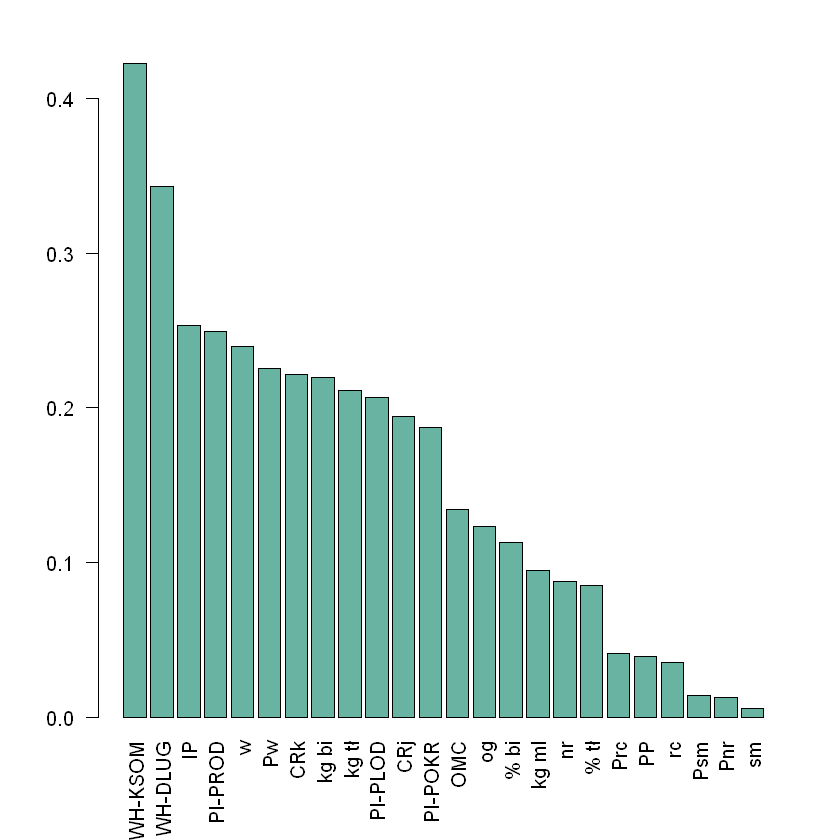

In [46]:
barplot(height=korelacje$V1[2:25],
        col="#69b3a2",
        names.arg=korelacje$nazwy[2:25], 
        ylim=c(round(min(korelacje$V1[2:25]),1),
               round(max(korelacje$V1[2:25]),1)),
        las=2,
       )

In [18]:
#write.csv(cale_train,"D:/STUDIA/ROK_II/Projekt/IE_DANE_DO_KORELACJI.csv", row.names = FALSE)

# 4. Modyfikacje danych

## 4.1 Artefakty

In [19]:
#IP 0.239824 	 oraz 	 Psm 0.013767 -> 	 IP | Psm 0.260667
#OMC 0.146792 	 oraz 	 PP 0.046453 -> 	 OMC | PP 0.170628
cale_artefakty<-cale_train
cale_artefakty$IP_Psm=cale_artefakty$IP/cale_artefakty$Psm
cale_artefakty$OMC_PP=cale_artefakty$OMC/cale_artefakty$PP
cale_artefakty$Psm<- NULL
cale_artefakty$IP <-NULL
cale_artefakty$OMC<- NULL
cale_artefakty$PP <-NULL


## 4.3 Dane odstające

### 4.3.1 Podejście jedno-wymiarowe 

To wspisy, które według metryki między kwantylowej
są  poza zakresem Q3-Q1

In [20]:
box_plot_odstajce <- function (zmienna,nazwa){
  boxplot(zmienna, main = nazwa
  )
  out <- boxplot.stats(zmienna)$out
  mtext(paste("Outliers: ", paste(out, collapse = ", ")))
  out_ind <- which(zmienna %in% c(out))
  return (out_ind)
}
cale_bez_odst_j <- cale_train

In [21]:
colnames(cale_bez_odst_j)

[1] "Województwo"    "Data urodzenia" "IE"             "PI-PROD"       
 [5] "PI-POKR"        "Prc"            "Psm"            "Pnr"           
 [9] "Pw"             "PI-PLOD"        "CRj"            "CRk"           
[13] "PP"             "OMC"            "WH-KSOM"        "WH-DLUG"       
[17] "IP"             "kg ml"          "kg tł"          "% tł"          
[21] "kg bi"          "% bi"           "rc"             "sm"            
[25] "nr"             "w"              "og"

#### Zbieram wpisy odstające każdej zmiennej do odpowiedniej zmiennnych

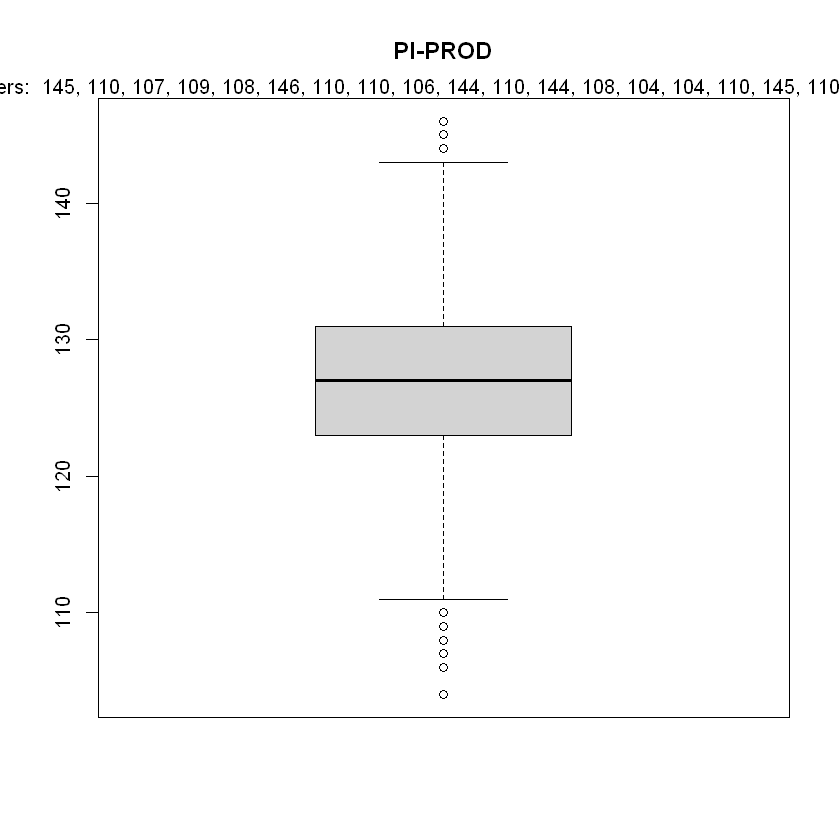

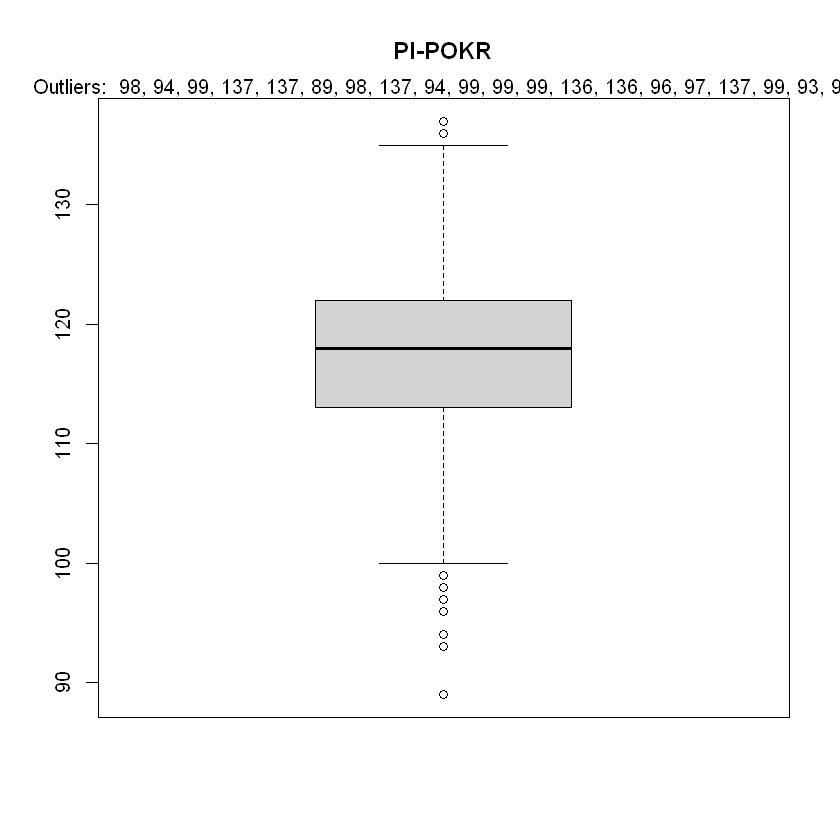

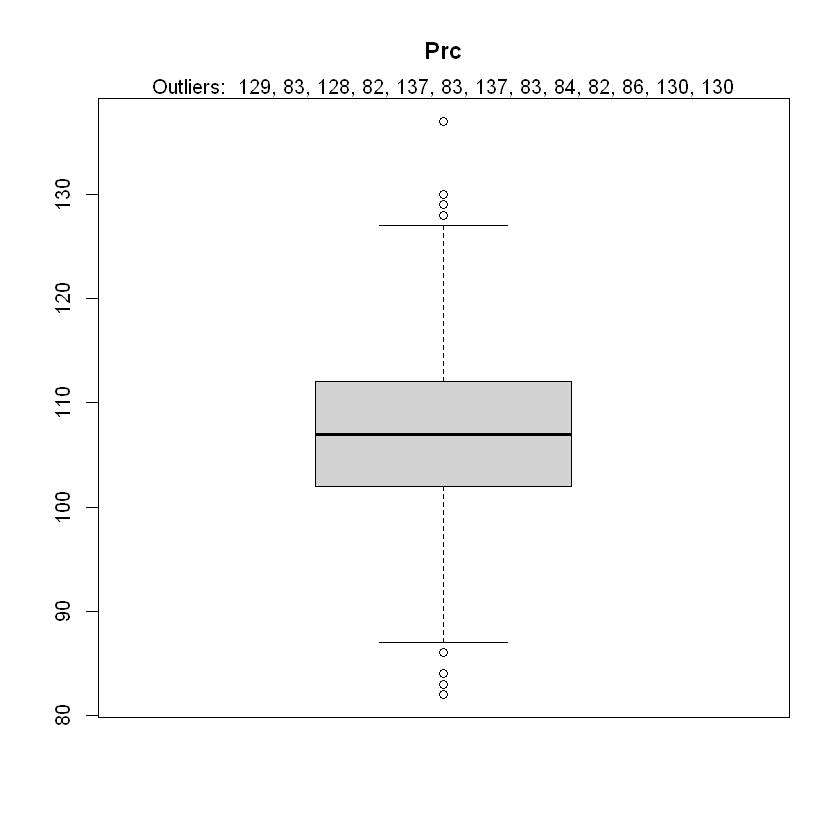

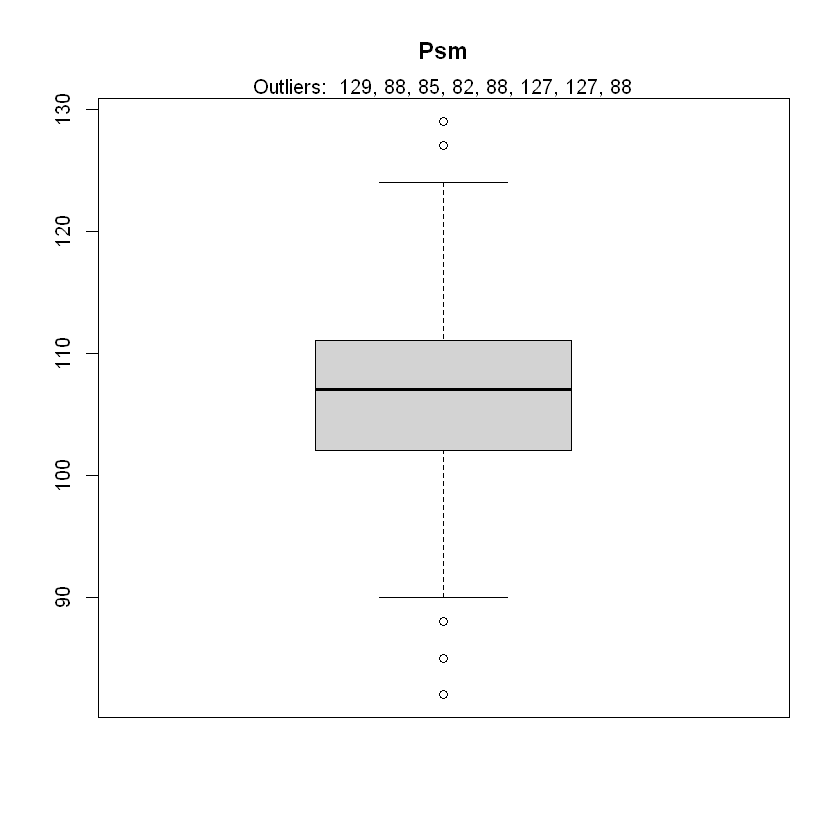

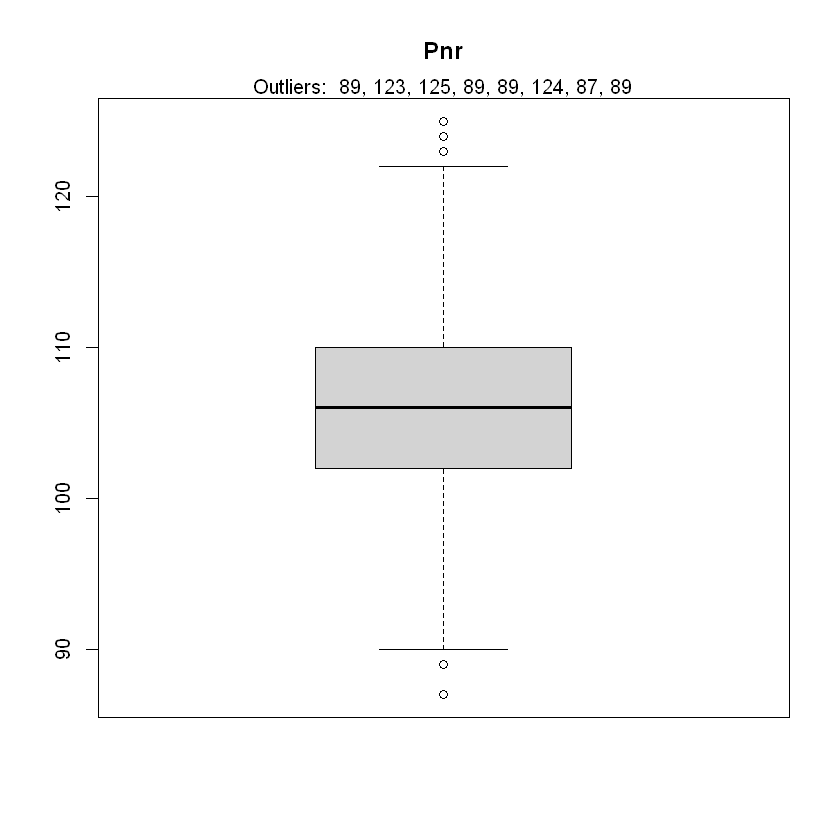

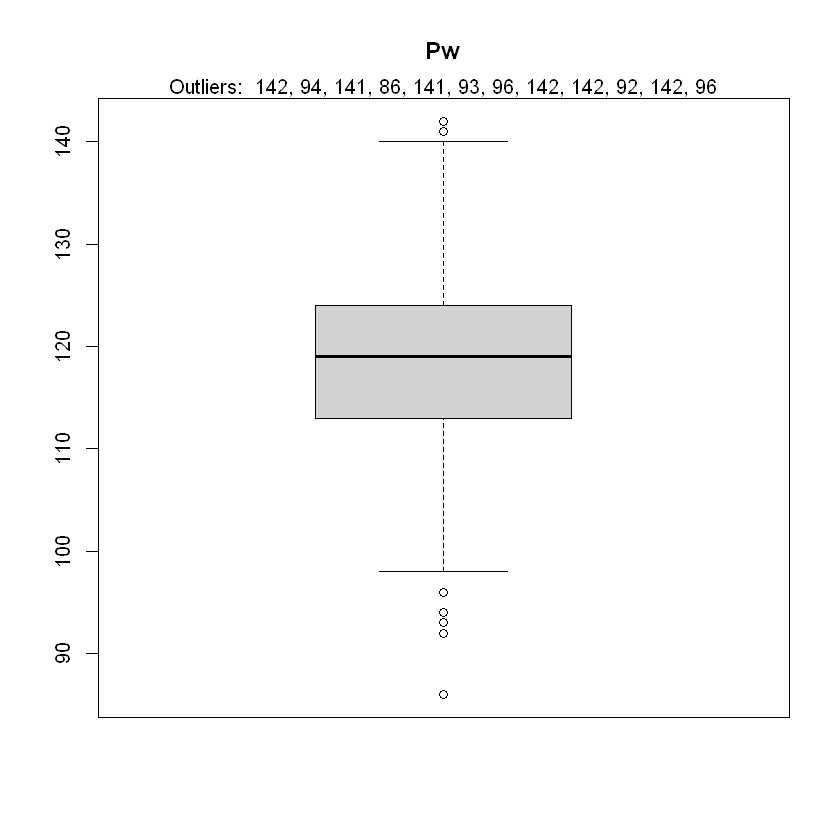

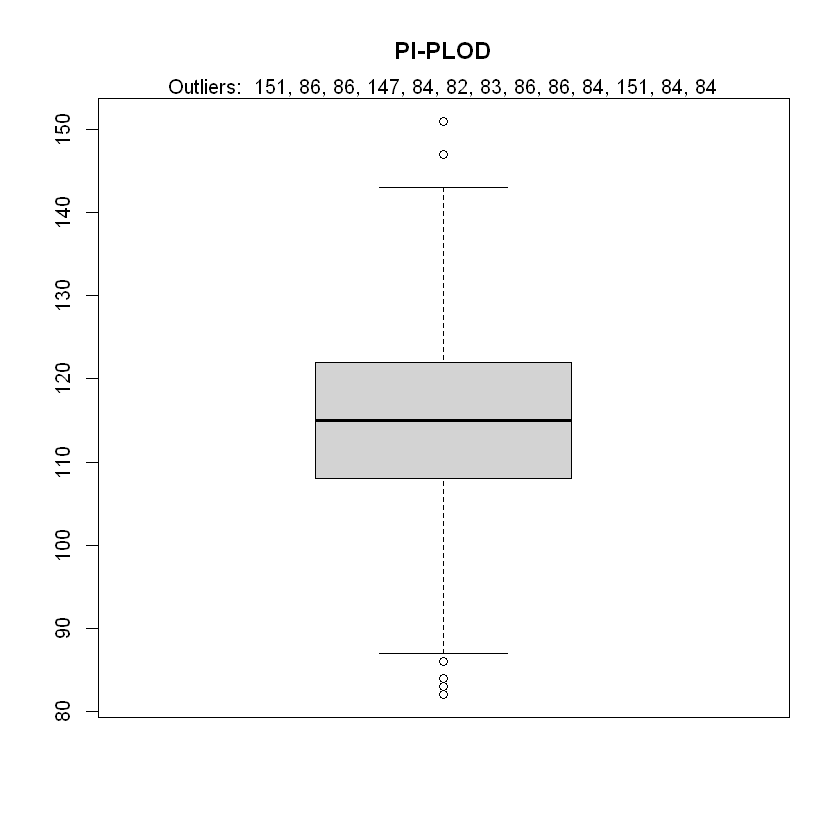

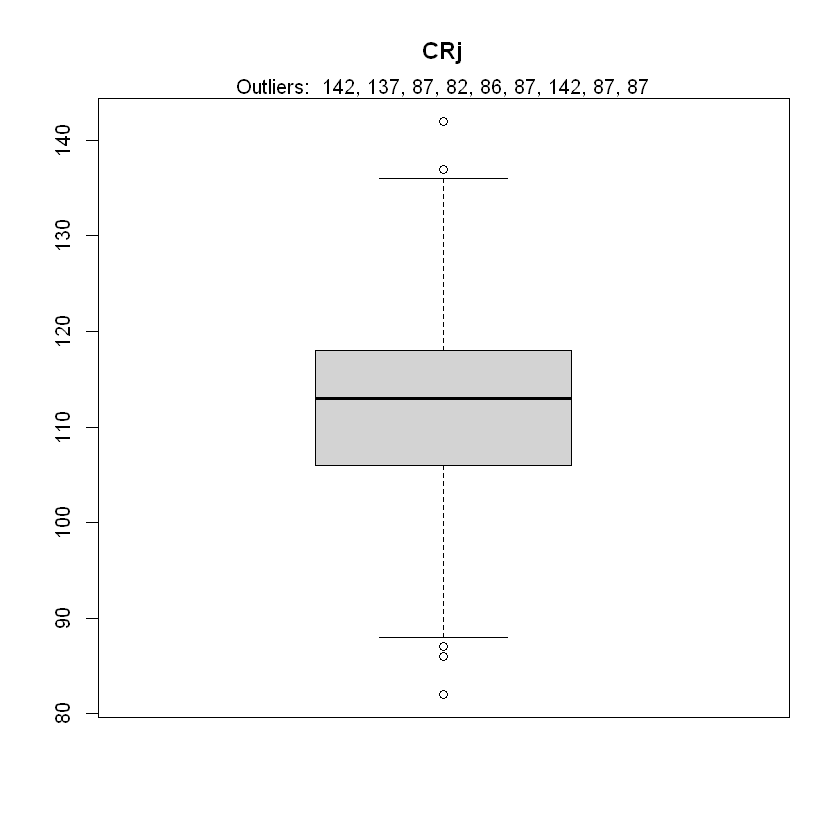

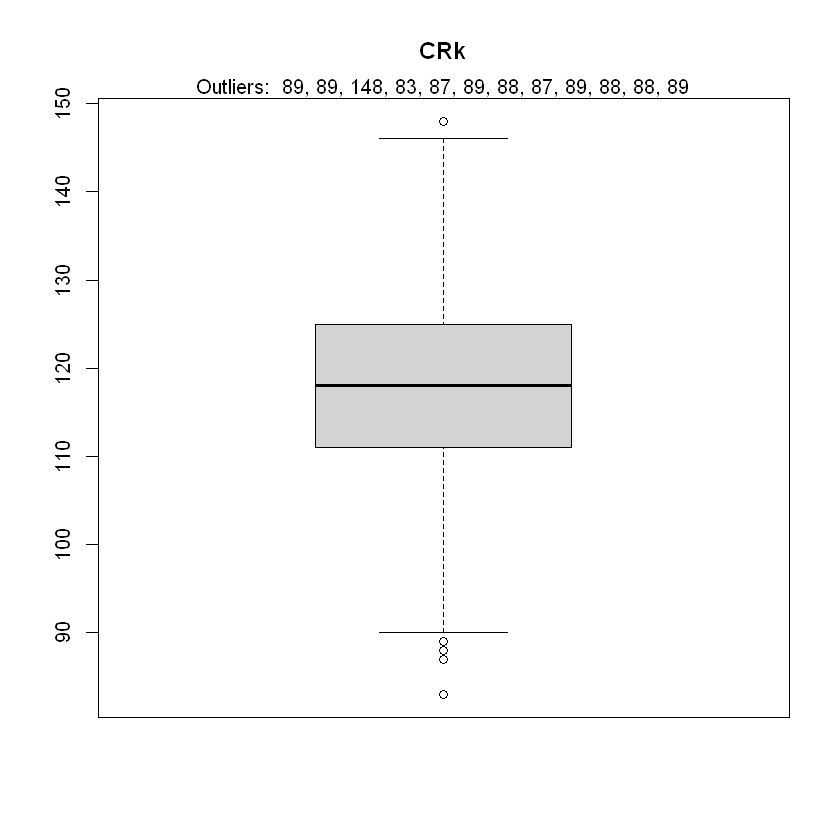

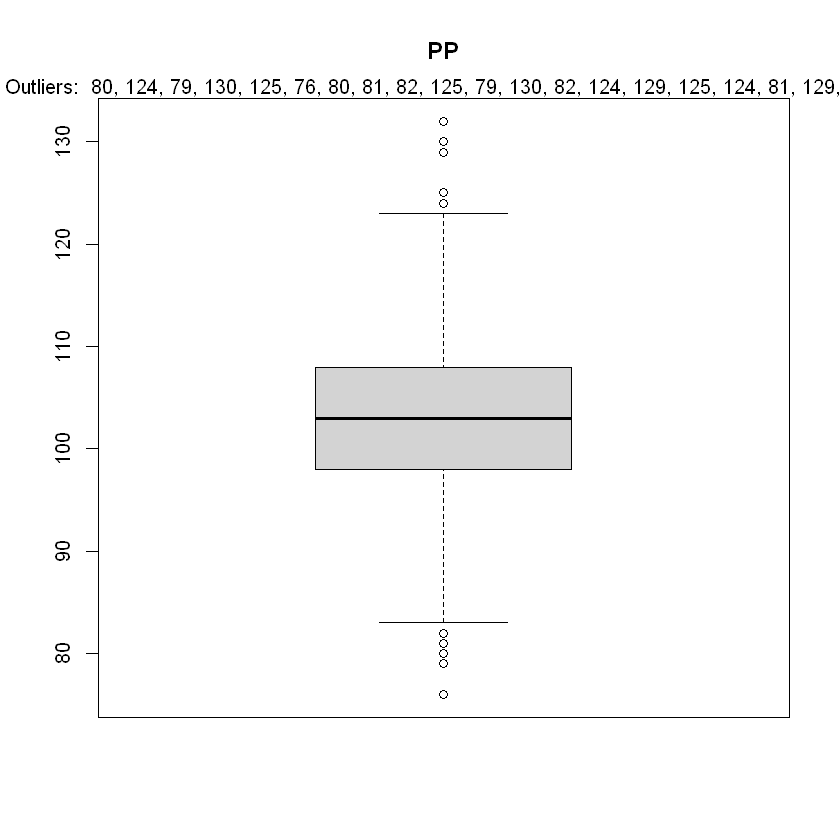

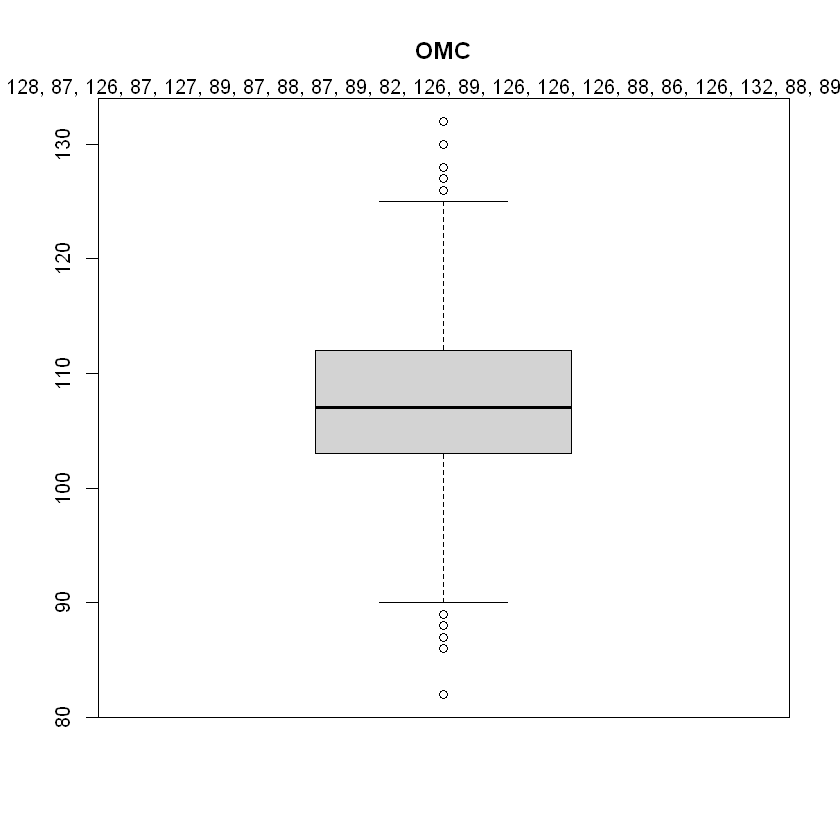

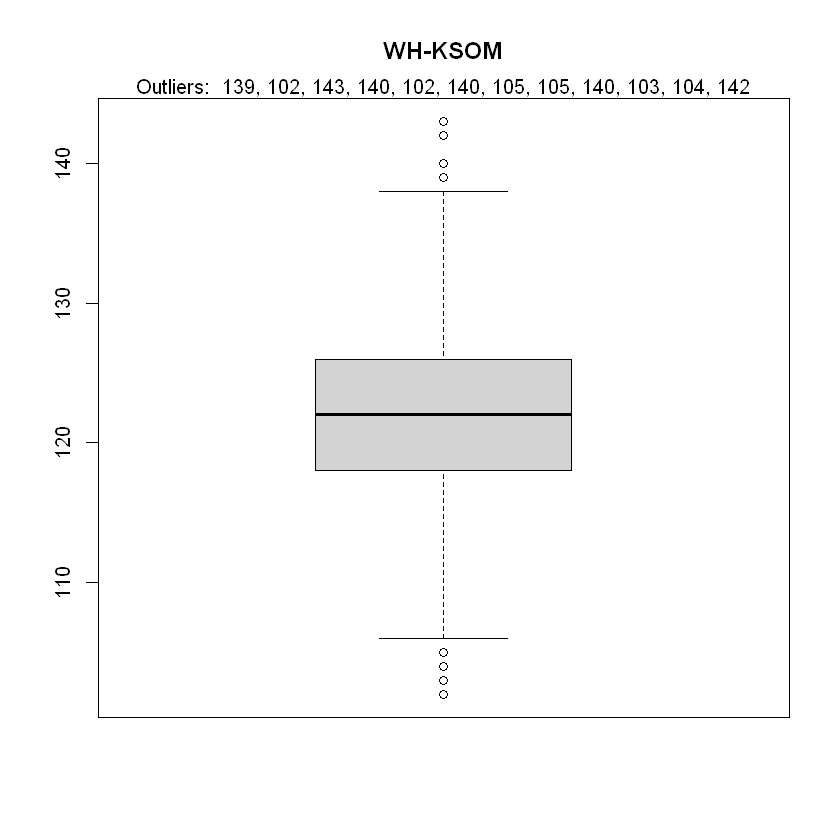

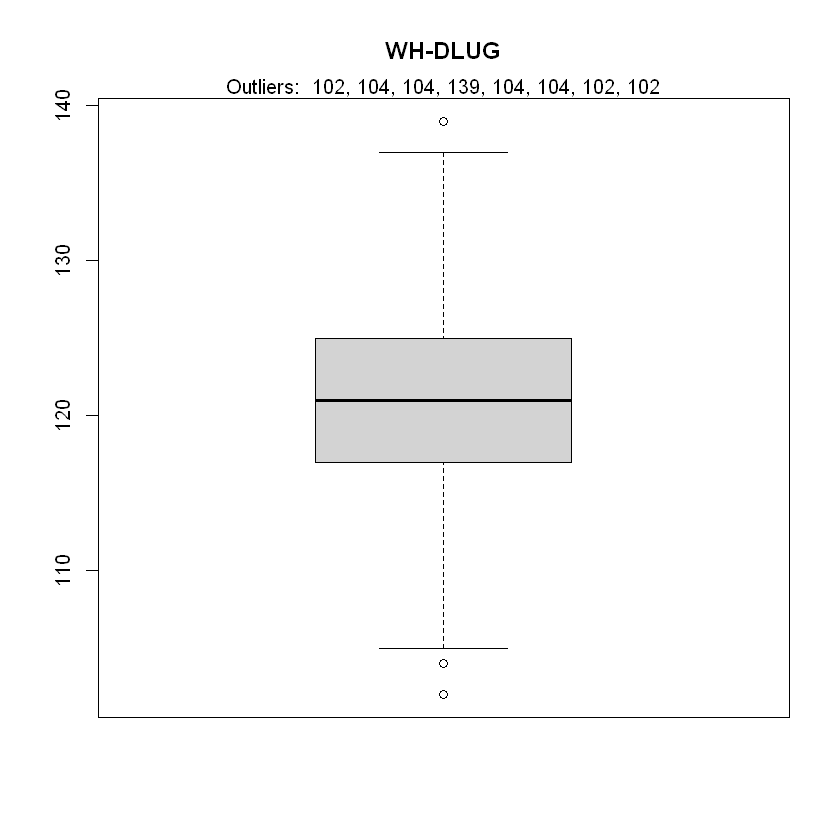

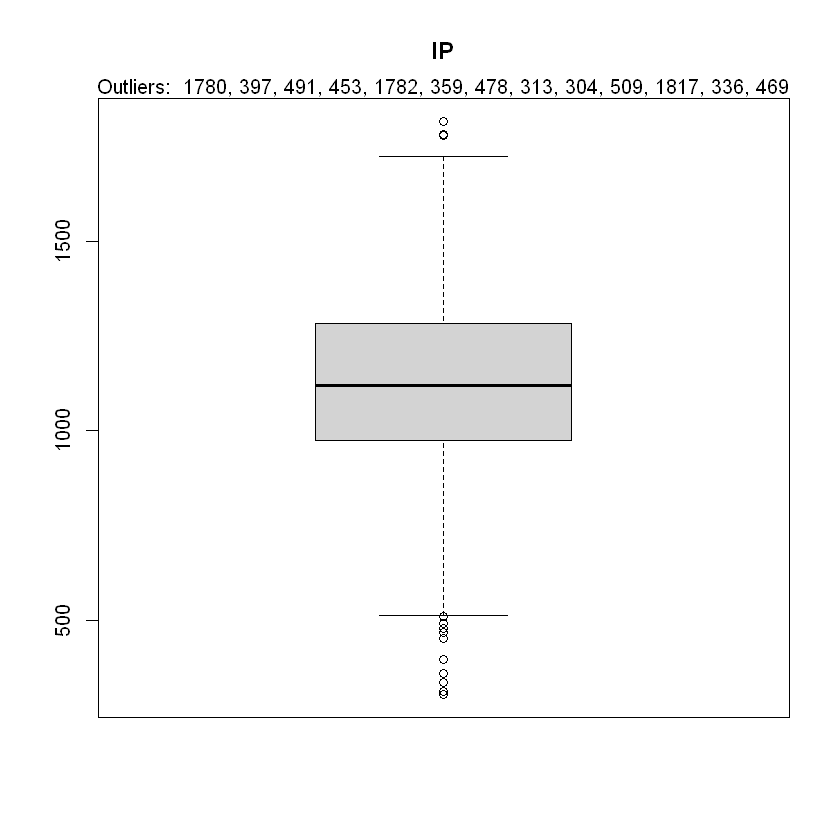

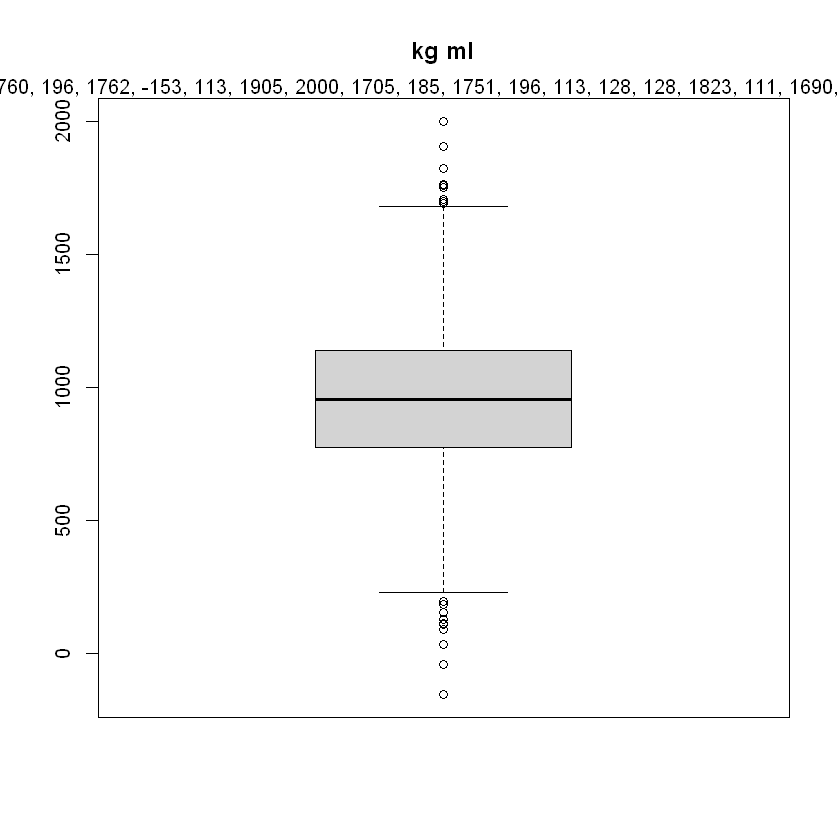

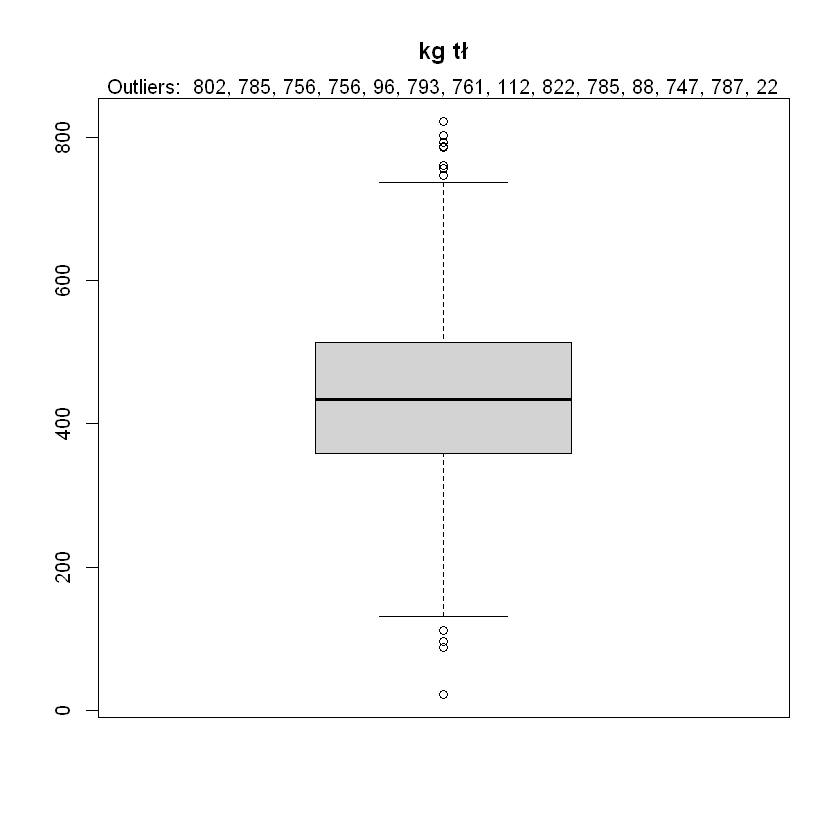

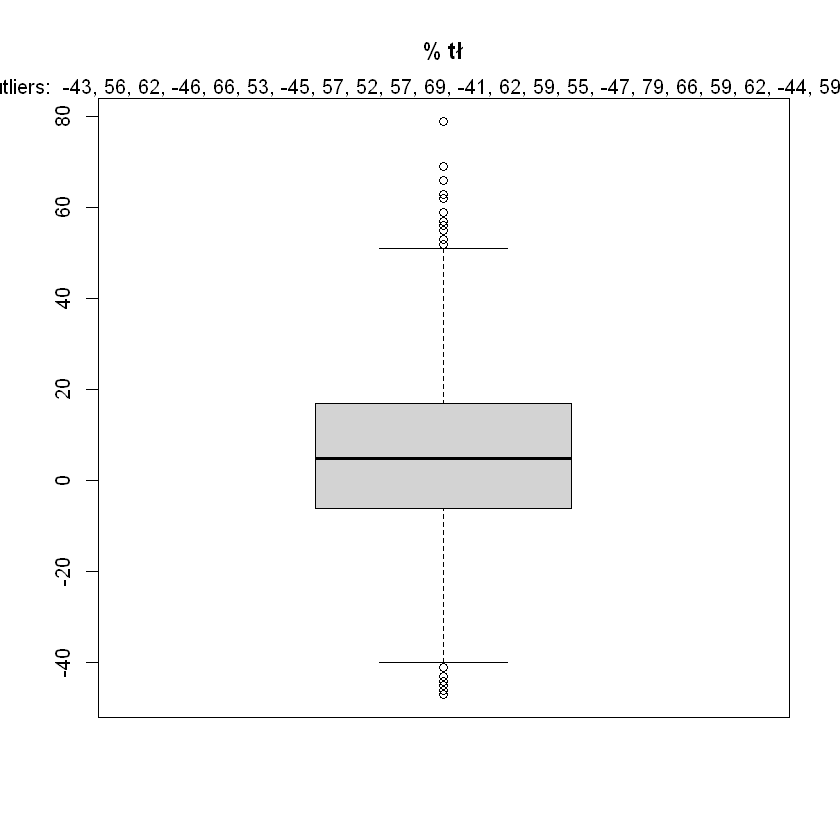

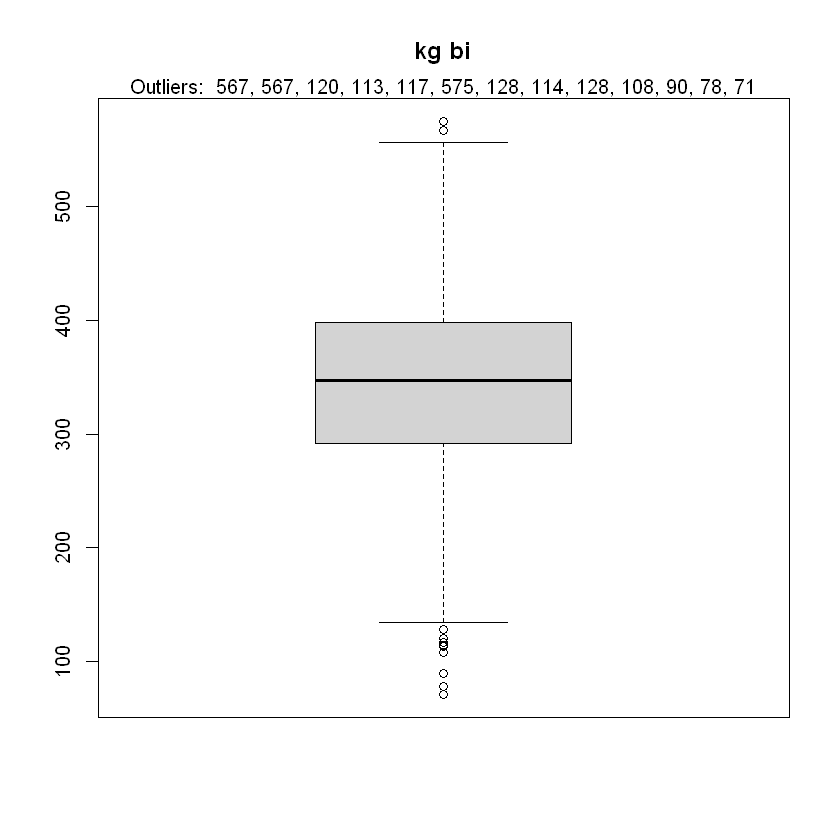

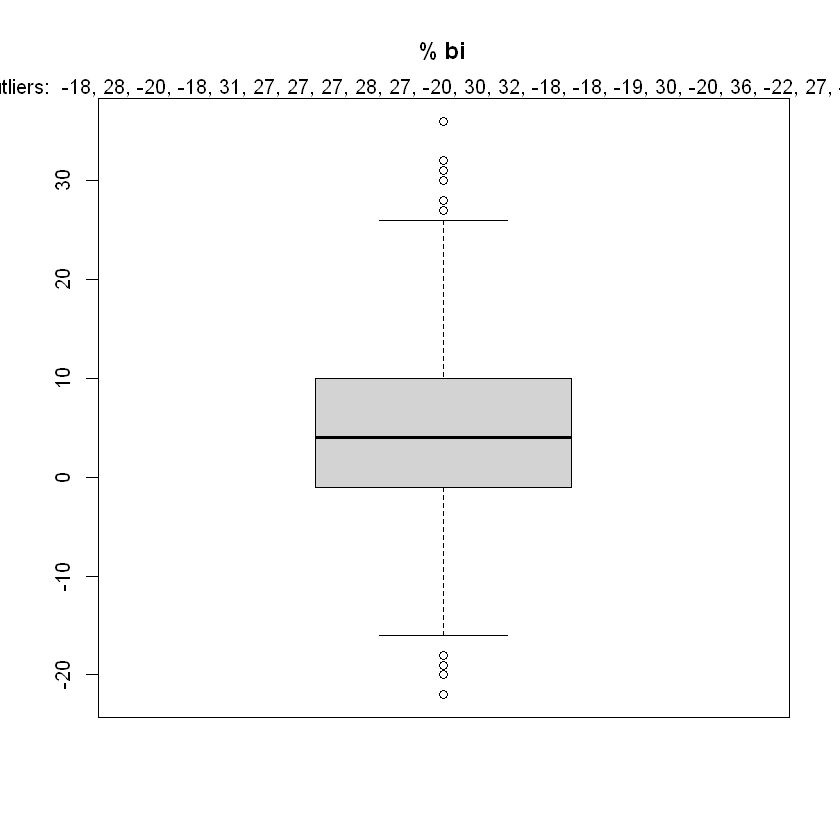

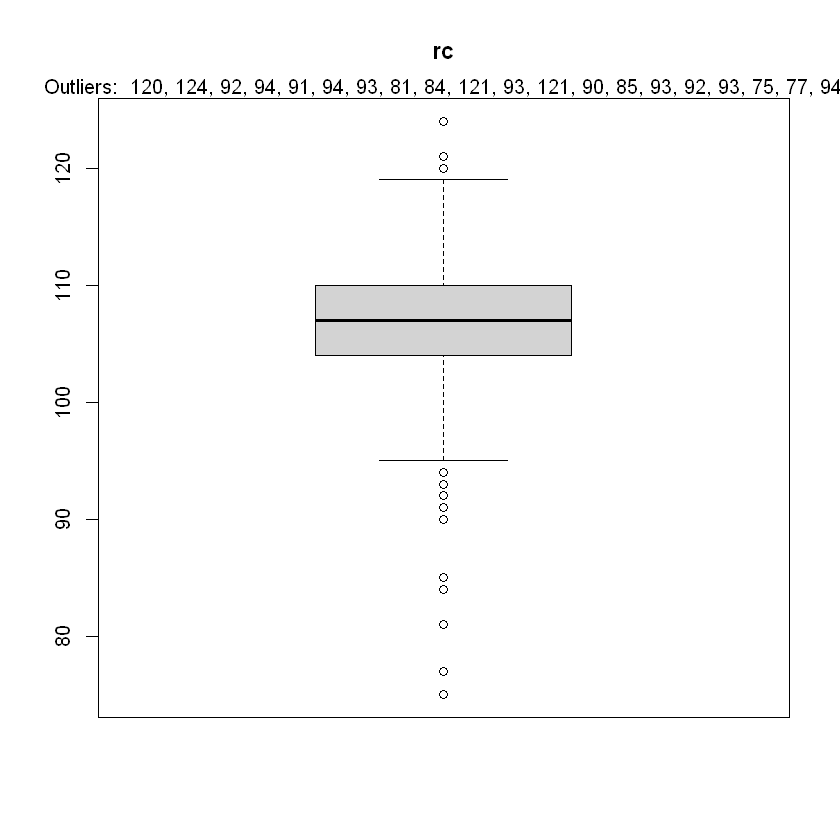

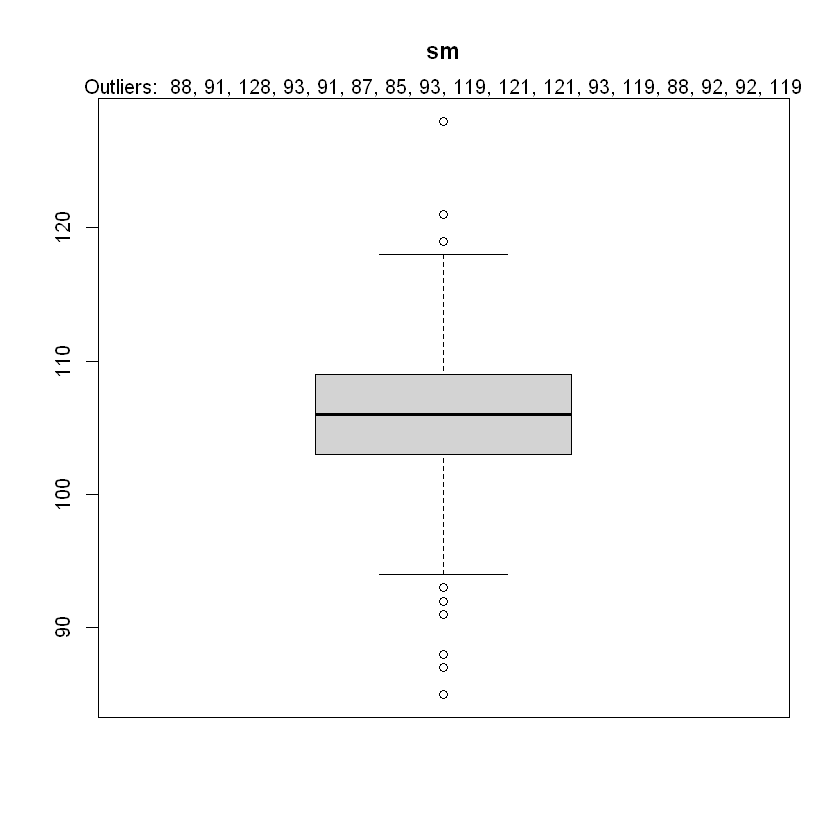

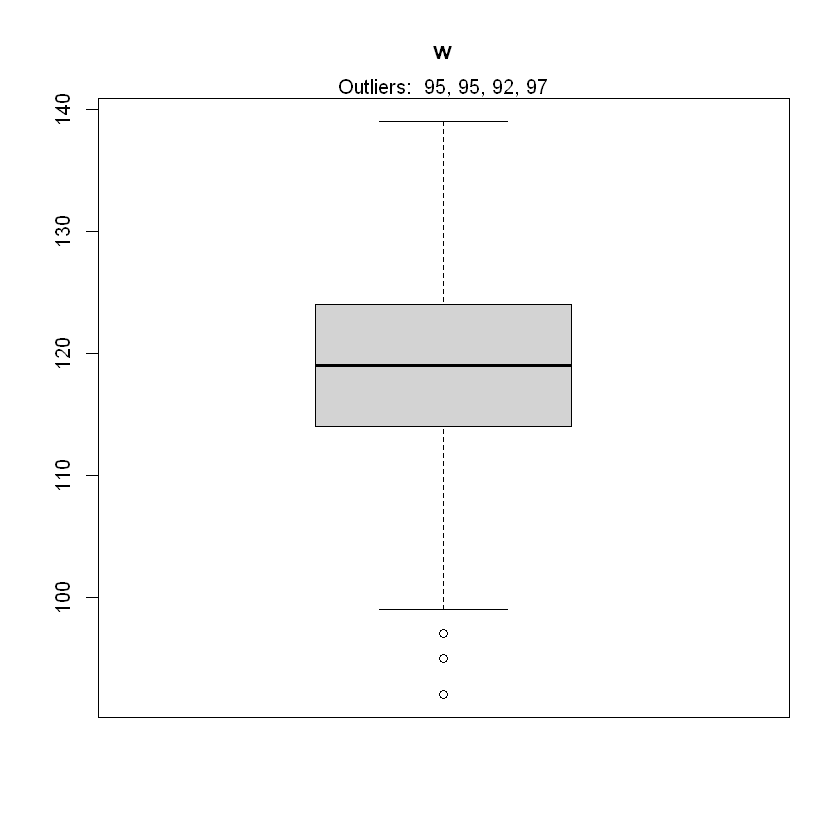

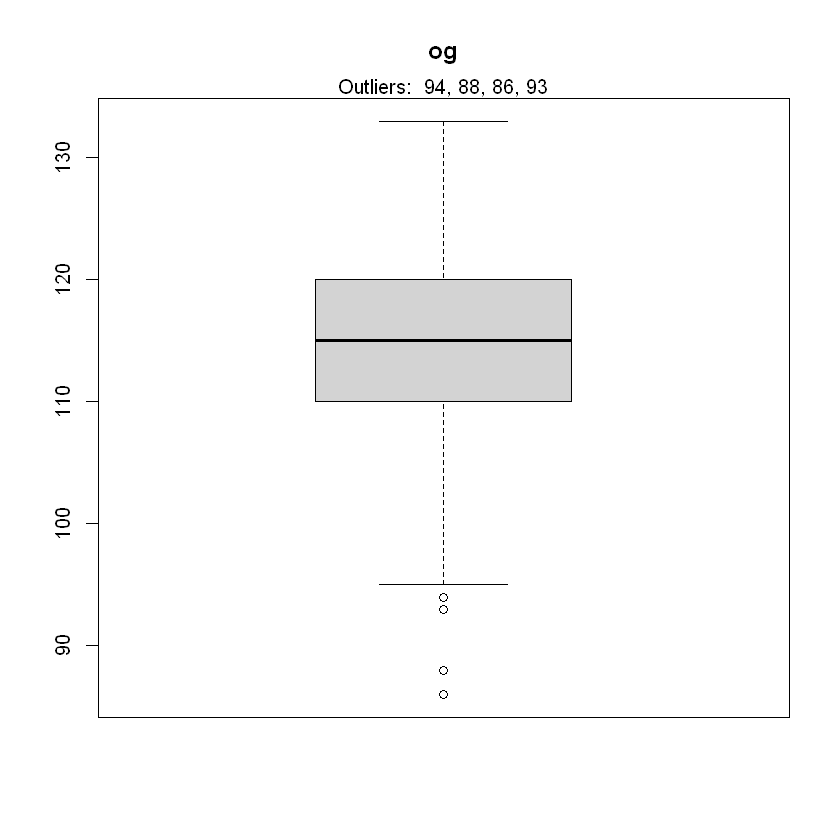

In [22]:
PI_PROD = box_plot_odstajce(cale_bez_odst_j$"PI-PROD","PI-PROD")
PI_POKR = box_plot_odstajce(cale_bez_odst_j$"PI-POKR","PI-POKR")
Prc = box_plot_odstajce(cale_bez_odst_j$Prc,"Prc")
Psm = box_plot_odstajce(cale_bez_odst_j$Psm,"Psm") 
Pnr = box_plot_odstajce(cale_bez_odst_j$Pnr,"Pnr")
Pw = box_plot_odstajce(cale_bez_odst_j$Pw,"Pw")
PI_PLOD = box_plot_odstajce(cale_bez_odst_j$"PI-PLOD","PI-PLOD")
CRj = box_plot_odstajce(cale_bez_odst_j$CRj,"CRj")
CRk = box_plot_odstajce(cale_bez_odst_j$CRk,"CRk")
PP = box_plot_odstajce(cale_bez_odst_j$PP,"PP")
OMC =box_plot_odstajce(cale_bez_odst_j$OMC,"OMC")
WH_KSOM = box_plot_odstajce(cale_bez_odst_j$"WH-KSOM","WH-KSOM")
WH_DLUG = box_plot_odstajce(cale_bez_odst_j$"WH-DLUG","WH-DLUG")
IP = box_plot_odstajce(cale_bez_odst_j$IP,"IP")
kg_ml = box_plot_odstajce(cale_bez_odst_j$'kg ml','kg ml')
kg_tĹ = box_plot_odstajce(cale_bez_odst_j$'kg tł','kg tł')
X_tĹ = box_plot_odstajce(cale_bez_odst_j$'% tł','% tł')
kg_bi = box_plot_odstajce(cale_bez_odst_j$'kg bi','kg bi')
X_bi = box_plot_odstajce(cale_bez_odst_j$'% bi','% bi')
rc = box_plot_odstajce(cale_bez_odst_j$rc,"rc")
sm = box_plot_odstajce(cale_bez_odst_j$sm,"sm")
w = box_plot_odstajce(cale_bez_odst_j$w,"w")
og = box_plot_odstajce(cale_bez_odst_j$og,"og")

### 4.3.2 Usunięcie obserwacji odstających

Tworzę wektor wszytkich odstjąych wpisów, do ich poźniejszego usunięcia

In [23]:
wiersze=c()
wiersze = c(wiersze,PI_PROD)
wiersze = c(wiersze,PI_POKR)
wiersze = c(wiersze,Prc)
wiersze = c(wiersze,Psm)
wiersze = c(wiersze,Pnr)
wiersze = c(wiersze,Pw)
wiersze = c(wiersze,PI_PLOD)
wiersze = c(wiersze,CRj)
wiersze = c(wiersze,CRk)
wiersze = c(wiersze,PP)
wiersze = c(wiersze,OMC)
wiersze = c(wiersze,WH_KSOM)
wiersze = c(wiersze,WH_DLUG)
wiersze = c(wiersze,IP)
wiersze = c(wiersze,kg_ml)
wiersze = c(wiersze,kg_tĹ)
wiersze = c(wiersze,X_tĹ)
wiersze = c(wiersze,kg_bi)
wiersze = c(wiersze,X_bi)
wiersze = c(wiersze,rc)
wiersze = c(wiersze,sm)
wiersze = c(wiersze,w)
wiersze = c(wiersze,og)

In [24]:
table(wiersze)

wiersze
   5    6   10   23   28   38   42   45   47   61   77   87   91   97   98   99 
   1    1    2    1    1    1    2    1    1    2    2    1    1    1    1    1 
 134  136  139  145  151  154  165  169  170  172  173  174  178  179  182  184 
   1    1    1    2    2    2    1    3    1    1    4    2    1    1    1    1 
 188  201  202  212  237  243  250  276  283  285  298  307  326  344  348  351 
   2    1    1    3    1    1    1    1    2    2    4    1    1    1    1    3 
 362  364  371  374  378  380  382  383  385  390  391  396  405  415  428  429 
   1    1    7    1    1    1    2    2    1    1    2    2    1    3    1    1 
 431  463  472  473  503  511  514  518  522  528  543  566  586  610  615  617 
   1    1    1    2    1    1    1    2    1    2    1    1    1    3    1    3 
 619  633  634  649  654  658  661  666  686  691  697  698  702  705  713  716 
   1    1    1    1    1    3    3    1    1    2    3    2    1    1    2    1 
 722  726  728  729 

In [25]:
wiersze_u= unique(wiersze)
length(wiersze_u)

[1] 216

Wpisów odstających jednowymiarowo jest łącznie 225, poniżej je usuwam

In [26]:
cale_bez_odst_j$ID <- rownames(cale_bez_odst_j)
cale_bez_odst_j <- cale_bez_odst_j[!cale_bez_odst_j$ID%in% as.vector(wiersze_u), ]
cale_bez_odst_j$ID <- NULL

In [27]:
dim(cale_train)

[1] 1875   27

### 4.3.3 Podejście wielowymiarowe

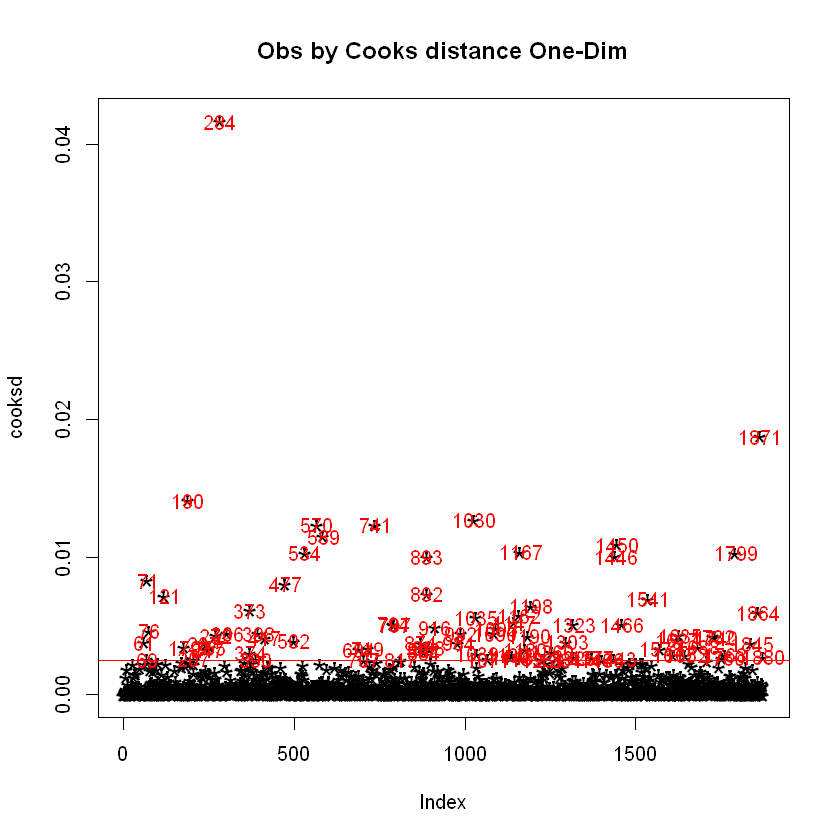

In [28]:
model_odst_w <- lm(IE ~., data=cale_train)
cooksd <- cooks.distance(model_odst_w)

plot(cooksd, pch="*", cex=2, main="Obs by Cooks distance One-Dim")  # plot cook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, 
     labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels

wpisy=as.vector(ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""))
wpisy= wpisy[!wpisy==""]
wpisy=as.numeric(wpisy)

In [29]:
wpisy

[1]   61   69   71   76  121  179  190  207  237  247  255  272  284  306  373
[16]  374  390  398  417  477  502  534  570  589  694  707  719  741  794  797
[31]  817  874  882  884  892  893  898  916  984  992 1030 1035 1039 1071 1090
[46] 1095 1130 1143 1147 1162 1167 1169 1180 1190 1198 1231 1260 1284 1303 1323
[61] 1325 1377 1406 1443 1446 1450 1466 1541 1578 1617 1627 1635 1652 1688 1732
[76] 1740 1760 1768 1799 1845 1864 1871 1880

In [30]:
length(wpisy)

[1] 83

Odstających  wielowymiarowe wpisów jest 4

In [31]:
cale_bez_odst_w <- cale_train
cale_bez_odst_w$ID <- 1:length(cale_bez_odst_w$IE)
cale_bez_odst_w <- cale_bez_odst_w[!cale_bez_odst_w$ID%in% wpisy, ]
cale_bez_odst_w$ID <- NULL
model_odst_w <-NULL

### 4.3.4 Jednowymiarowe i wielowymiarowe

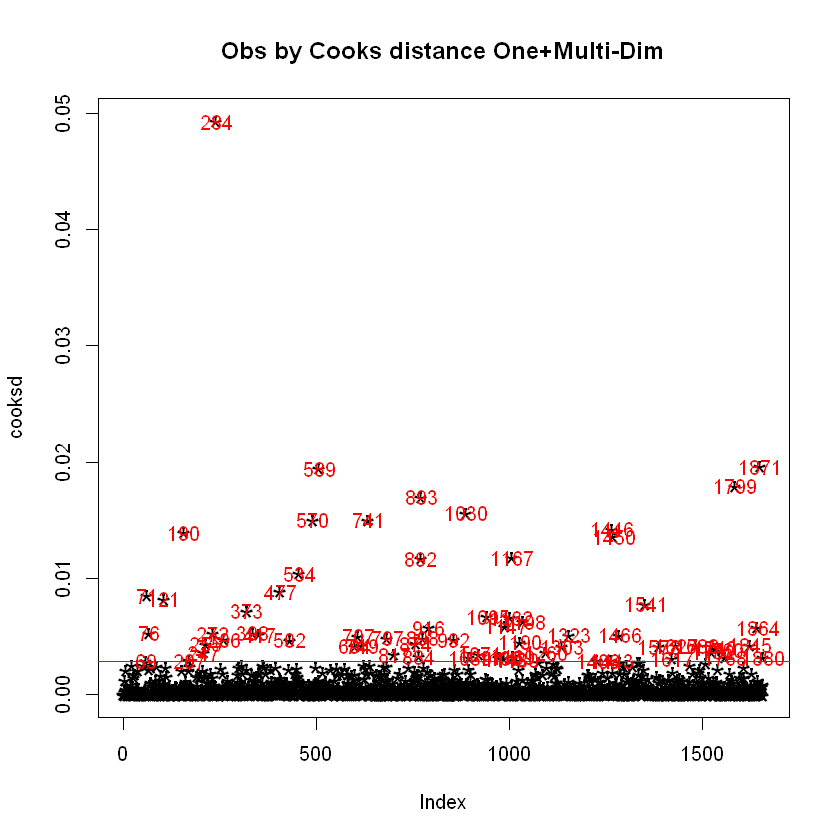

In [32]:
model_odst_j_i_w <- lm(IE ~., data=cale_bez_odst_j)

cooksd <- cooks.distance(model_odst_j_i_w)

plot(cooksd, pch="*", cex=2, main="Obs by Cooks distance One+Multi-Dim")  # plot cook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, 
     labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels


wpisy=as.vector(ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""))
wpisy= wpisy[!wpisy==""]
wpisy=as.numeric(wpisy)

In [33]:
length(wpisy)

[1] 67

Odstających wielowymiarowe wpisów jest 69. O 65 więcej, po usunięciu odstających jednowymiarowo

In [34]:
cale_bez_odst_j_i_w <- cale_bez_odst_j
cale_bez_odst_j_i_w$ID <-1:length(cale_bez_odst_j$IE)
cale_bez_odst_j_i_w <-cale_bez_odst_j_i_w[!cale_bez_odst_j_i_w$ID%in% wpisy, ]
cale_bez_odst_j_i_w$ID <- NULL
model_odst_j_i_w <- NULL

## 4.4 PCA

In [35]:
train_do_pca=rbind(train_df, test_df)

In [36]:
train_do_pca=rbind(train_df, test_df)

In [37]:
train_do_pca$'Województwo'<- NULL
val_df$'Data urodzenia'<- NULL
val_df$'Województwo'<- NULL
train_do_pca$'Data urodzenia'<- NULL


In [38]:
str(train_do_pca)

'data.frame':	1692 obs. of  25 variables:
 $ IE     : int  2120 1912 2126 2089 2853 2088 2173 2139 2178 2303 ...
 $ PI-PROD: int  137 126 126 133 125 135 138 122 129 145 ...
 $ PI-POKR: int  127 123 120 111 115 115 121 120 118 127 ...
 $ Prc    : int  121 109 110 104 91 111 109 116 102 121 ...
 $ Psm    : int  113 113 107 110 95 112 105 110 112 124 ...
 $ Pnr    : int  106 103 102 99 101 99 108 113 96 110 ...
 $ Pw     : int  128 128 124 114 124 118 123 116 125 124 ...
 $ PI-PLOD: int  109 114 113 114 134 122 99 128 110 106 ...
 $ CRj    : int  107 114 112 113 129 124 98 120 107 106 ...
 $ CRk    : int  110 113 117 126 133 119 107 135 113 113 ...
 $ PP     : int  101 94 94 89 102 80 107 110 105 97 ...
 $ OMC    : int  105 98 100 100 113 93 107 121 107 101 ...
 $ WH-KSOM: int  112 118 126 116 139 121 116 127 119 118 ...
 $ WH-DLUG: int  117 121 121 118 130 113 120 123 124 117 ...
 $ IP     : int  1481 1066 1068 1366 1079 1420 1536 910 1236 1780 ...
 $ kg ml  : int  1370 1209 982 1080 51

In [39]:
train_do_pca[,1]

[1] 2120 1912 2126 2089 2853 2088 2173 2139 2178 2303 2673 2124 2306 2222
  [15] 2297 2102 2088 2115 1919 2446 2141 2201 1954 2288 2203 2211 2042 2547
  [29] 2089 2142 2249 2307 2154 2104 2085 2121 2469 2215 2154 2087 2182 2141
  [43] 2180 2118 2139 2330 1964 2085 1917 2204 2636 2441 2118 2278 2135 2127
  [57] 2157 2182 2408 2083 2008 2253 2484 1983 2089 2331 1985 2151 2445 2122
  [71] 2026 1937 2380 2564 2096 1908 2201 2253 2177 2168 2208 2847 2138 2113
  [85] 2142 2578 1954 2119 2186 2567 2141 2279 2107 2218 2393 2145 2120 2104
  [99] 2080 2441 2023 1940 2789 1945 2146 2132 2198 2084 1911 2222 2213 2461
 [113] 2197 2463 2087 2165 2210 2201 1968 2084 1977 2307 2179 2195 1925 2138
 [127] 2378 2092 2239 2410 2148 2712 2210 2093 2197 2852 2069 2391 1906 2418
 [141] 2147 2223 2412 2192 2328 2470 2225 2263 2691 2245 2814 2204 2142 2143
 [155] 2209 2182 2409 2111 2175 2132 2196 2511 2204 2093 2808 2092 2439 2101
 [169] 1934 2141 2126 2111 2309 1976 2413 1916 2091 2262 2042 2156 2310 2146
 [183] 2168 2095 2189 2196 2465 1987 2130 1958 2418 2711 2389 2189 2498 2320
 [197] 2227 2404 2297 2164 1941 1928 2221 2168 2344 2021 2100 2573 2198 2392
 [211] 2216 2145 2422 2241 1970 2111 1937 2111 2125 1909 2022 2275 2200 2306
 [225] 2087 1958 2134 2216 2169 2161 2260 2101 2350 2134 2115 2152 2045 2193
 [239] 2087 2534 2220 2365 2130 2280 2074 2168 1904 2302 2091 2117 1910 2190
 [253] 2167 2191 2567 2105 2142 2125 2181 2162 2374 2251 2230 2336 2086 2118
 [267] 2136 2217 2034 1958 2207 2107 2084 2059 1969 2353 2361 2213 2108 2175
 [281] 2215 2231 2200 2070 2180 2201 2535 2409 2169 2085 2218 2082 2133 2144
 [295] 2200 2115 2145 2130 2029 2281 2279 2158 2134 2175 2235 2186 2981 2066
 [309] 2401 2101 2127 2128 2081 2240 2156 2155 2158 2129 2202 2393 2363 2101
 [323] 1925 2177 2168 2100 2186 2941 2096 2103 2162 1961 1907 2233 2132 2134
 [337] 2330 2692 2248 2144 2162 2294 2520 2328 2222 2117 1915 2146 2291 1911
 [351] 2189 2147 2096 2148 2109 1986 1920 1918 2134 2214 2235 2128 2300 2079
 [365] 2004 1952 2249 2345 1933 2547 2204 2582 1931 2226 1909 2104 2100 2398
 [379] 2386 2169 2190 1918 2056 2136 1961 2088 2566 2104 2110 1916 2157 2146
 [393] 2421 2366 2132 2151 2111 1966 1912 2225 2441 2727 2389 2097 1935 2540
 [407] 2148 2376 2102 2207 2139 2281 2770 2192 2296 2180 2467 2165 2261 2389
 [421] 2322 2298 2155 2196 2105 1951 2249 2150 2135 2182 2088 2235 2123 2014
 [435] 2095 2328 2246 2237 2332 2061 2146 1946 2106 2183 2043 1923 2269 2175
 [449] 2183 2161 2159 2083 2270 2169 2202 2225 2160 2272 2278 2370 2313 2106
 [463] 2242 1975 2123 2089 2157 2204 1937 1959 2251 2146 2117 2013 2163 2188
 [477] 2359 2176 2342 2168 1981 2138 2091 2235 2220 2161 2130 2116 2168 2104
 [491] 1941 1954 2229 2151 1944 2135 2085 2427 1952 2473 2503 2284 2198 2116
 [505] 2188 2307 2479 2155 2084 2089 1940 2211 2240 2022 2199 2158 2088 2089
 [519] 2196 2264 1947 2304 2100 2052 2124 2699 2165 2138 2534 2207 1909 2182
 [533] 2214 2042 2300 2155 1970 2163 2031 2097 2201 1984 2536 1980 2112 2215
 [547] 2220 2125 2204 2264 2458 2517 2293 2086 2175 2088 2013 2204 2481 1963
 [561] 2331 2275 2100 2287 2192 2466 2236 2143 2214 2118 2156 2414 2247 2182
 [575] 2342 2152 2215 2136 2207 2203 2170 2306 2231 2316 2143 2087 2116 2121
 [589] 2097 1906 2126 2249 2232 2202 2169 2088 2282 2218 2533 1913 2146 2069
 [603] 2220 2094 2768 2130 2295 2304 2055 2142 2437 1907 2174 2175 2087 2091
 [617] 2352 2672 2179 2035 2010 2171 2881 2048 2145 2149 2027 2135 1911 2215
 [631] 2178 2449 1987 2335 2202 2214 2411 1905 2138 2148 2167 2168 2125 2184
 [645] 2138 1907 2091 2215 2138 1917 2543 2616 2168 2314 2111 2209 2379 1929
 [659] 2093 2046 1904 1945 2221 2566 2104 2210 2128 2179 2319 2138 2159 2208
 [673] 2341 2125 2124 2288 1984 2126 1932 2210 2208 2012 2558 2087 2212 2184
 [687] 2147 2105 2296 1965 1931 2133 2116 2171 2161 2378 2127 1969 2161 2174
 [701] 2211 2523 2503 2285 2031 2159 2024 2226 2140 2256 2067 2092 2111 2211
 [715] 2251 2334 2208 2148 2335 2327 2040 2411 2367 2052 2158 2091 1909 2083

In [40]:
train_do_pca

IE,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2120,137,127,121,113,106,128,109,107,110,...,1370,577,2,452,1,115,114,109,127,123
1912,126,123,109,113,103,128,114,114,113,...,1209,358,-16,354,-4,115,113,104,123,123
2126,126,120,110,107,102,124,113,112,117,...,982,368,-4,350,4,104,103,102,122,117
2089,133,111,104,110,99,114,114,113,126,...,1080,546,12,410,7,106,106,101,112,112
2853,125,115,91,95,101,124,134,129,133,...,516,501,36,289,15,102,102,118,123,109
2088,135,115,111,112,99,118,122,124,119,...,1069,554,13,433,10,111,107,103,117,118
2173,138,121,109,105,108,123,99,98,107,...,847,672,39,432,19,111,107,114,121,116
2139,122,120,116,110,113,116,128,120,135,...,380,284,16,313,24,110,107,119,114,115
2178,129,118,102,112,96,125,110,107,113,...,918,578,24,329,4,106,103,112,125,119


In [41]:
ie.pca <- prcomp(train_do_pca, center = TRUE,scale. = TRUE)

summary(ie.pca)


Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.5646 2.2938 1.6398 1.55458 1.33649 1.23979 1.07986
Proportion of Variance 0.2631 0.2105 0.1076 0.09667 0.07145 0.06148 0.04664
Cumulative Proportion  0.2631 0.4736 0.5811 0.67778 0.74923 0.81071 0.85735
                          PC8    PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.9772 0.8500 0.7070 0.69599 0.55503 0.45236 0.39885
Proportion of Variance 0.0382 0.0289 0.0200 0.01938 0.01232 0.00819 0.00636
Cumulative Proportion  0.8955 0.9245 0.9445 0.96383 0.97615 0.98434 0.99070
                         PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.3315 0.22788 0.17836 0.15951 0.08933 0.03990 0.03972
Proportion of Variance 0.0044 0.00208 0.00127 0.00102 0.00032 0.00006 0.00006
Cumulative Proportion  0.9951 0.99717 0.99844 0.99946 0.99978 0.99984 0.99991
                          PC22    PC23    PC24      PC

In [42]:
pr.var <- ie.pca$sdev^2
pve <- pr.var / sum(pr.var)
pve

[1] 2.630881e-01 2.104612e-01 1.075608e-01 9.666913e-02 7.144770e-02
 [6] 6.148272e-02 4.664357e-02 3.819956e-02 2.890326e-02 1.999587e-02
[11] 1.937601e-02 1.232239e-02 8.185177e-03 6.363306e-03 4.395605e-03
[16] 2.077167e-03 1.272526e-03 1.017791e-03 3.192210e-04 6.367250e-05
[21] 6.309186e-05 3.859584e-05 3.274112e-05 2.074962e-05 4.099536e-09

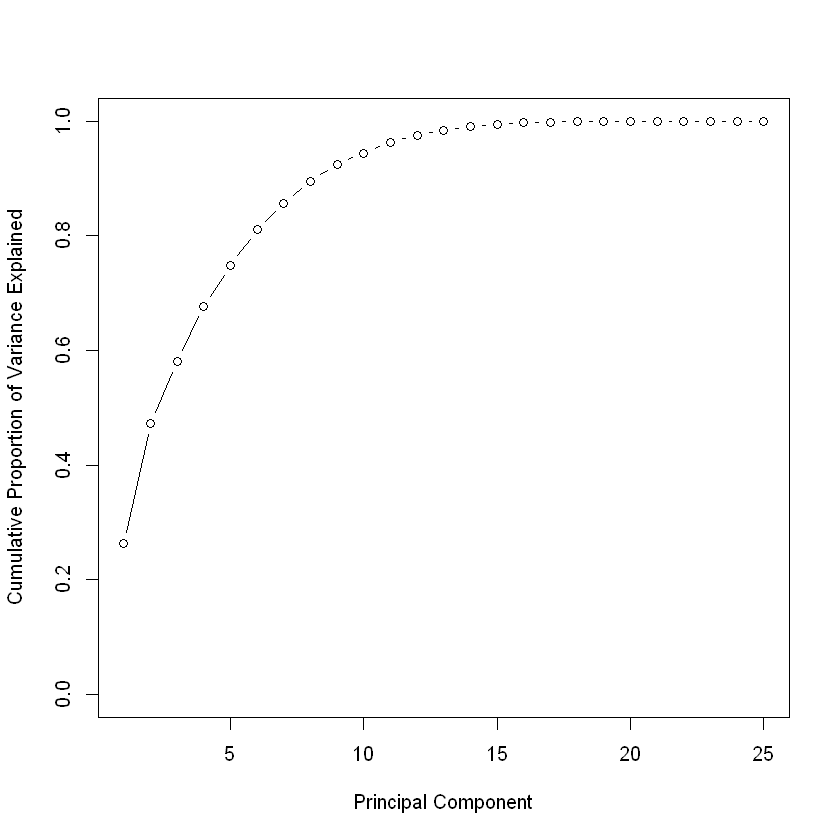

In [43]:
# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

In [ ]:
10 wyjasnia 95 % zmiennosci wariancji

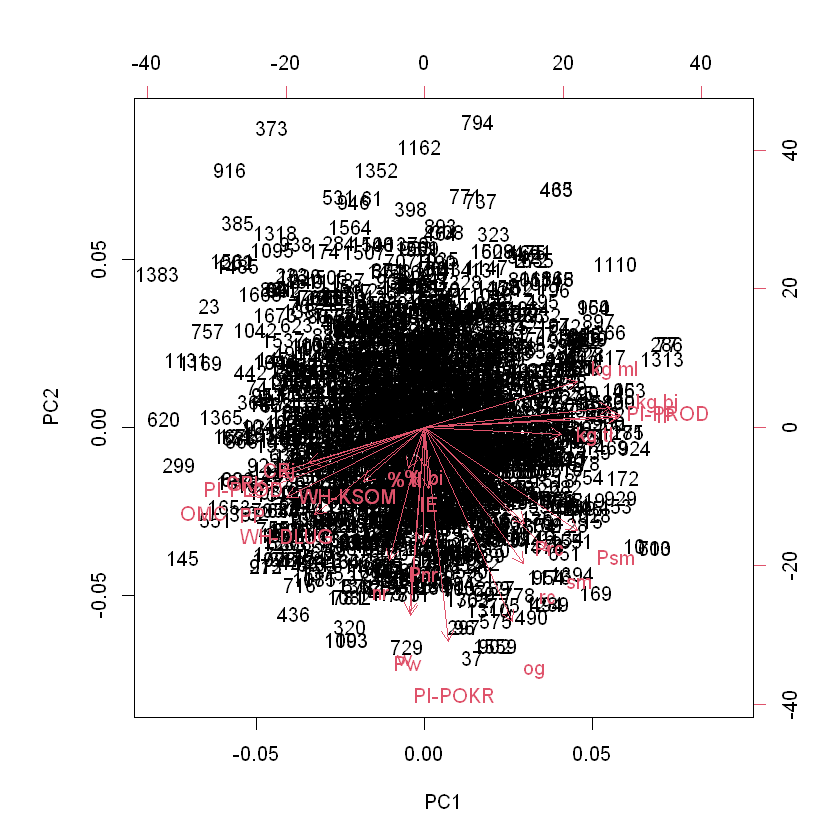

In [44]:
biplot(ie.pca)

# 5. Modele

## 5.1 Modele - budowa

In [34]:
train.control <- trainControl(method = "cv", number = 5,savePredictions = 'all')

### 5.1.1 Pełny

In [35]:
model_pelny <- train(IE ~., data=cale_train, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_pelny)


Linear Regression 

1875 samples
  26 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1499, 1500, 1501, 1500 
Resampling results:

  RMSE      Rsquared   MAE     
  27.79569  0.9720813  22.01536

Tuning parameter 'intercept' was held constant at a value of TRUE


### Bez daty urodzenia i województwa

In [36]:
cale_train_b_asd<-cale_train
cale_train_b_asd$'Województwo'<-NULL
cale_train_b_asd$'Data urodzenia'<-NULL
model_pelny_b_asd <- train(IE ~., data=cale_train_b_asd, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_pelny_b_asd)


Linear Regression 

1875 samples
  24 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1500, 1500, 1500, 1500 
Resampling results:

  RMSE     Rsquared   MAE     
  27.6856  0.9723002  22.02114

Tuning parameter 'intercept' was held constant at a value of TRUE


### Bez Województwa

In [37]:
cale_train_b_asd<-cale_train
cale_train_b_asd$'Województwo'<-NULL
model_pelny_b_asd <- train(IE ~., data=cale_train_b_asd, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_pelny_b_asd)


Linear Regression 

1875 samples
  25 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1501, 1499, 1500, 1500, 1500 
Resampling results:

  RMSE      Rsquared   MAE     
  27.76243  0.9721721  22.04521

Tuning parameter 'intercept' was held constant at a value of TRUE


### Bez daty urodzenia

In [38]:
cale_train_b_asd<-cale_train
cale_train_b_asd$'Data urodzenia'<-NULL
model_pelny_b_asd <- train(IE ~., data=cale_train_b_asd, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_pelny_b_asd)


Linear Regression 

1875 samples
  25 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1500, 1499, 1501, 1500 
Resampling results:

  RMSE      Rsquared  MAE     
  27.49055  0.972972  21.76712

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.2 Istotne

In [39]:
model_test=lm(IE~.,data=cale_train)

In [40]:
a=step(model_test)
summary(a)

Start:  AIC=12411.67
IE ~ Województwo + `Data urodzenia` + `PI-PROD` + `PI-POKR` + 
    Prc + Psm + Pnr + Pw + `PI-PLOD` + CRj + CRk + PP + OMC + 
    `WH-KSOM` + `WH-DLUG` + IP + `kg ml` + `kg tł` + `% tł` + 
    `kg bi` + `% bi` + rc + sm + nr + w + og

                   Df Sum of Sq      RSS   AIC
- `% bi`            1         5  1342517 12410
- `% tł`            1       150  1342661 12410
- `PI-PROD`         1       527  1343038 12410
- Pw                1       714  1343226 12411
<none>                           1342512 12412
- Pnr               1      2908  1345419 12414
- `Data urodzenia`  5      9850  1352362 12415
- `PI-PLOD`         1      4526  1347038 12416
- PP                1      4760  1347272 12416
- `kg tł`           1      5416  1347928 12417
- `kg bi`           1      5536  1348047 12417
- IP                1      5842  1348354 12418
- `PI-POKR`         1      7020  1349532 12419
- CRj               1      7215  1349726 12420
- Województwo      13     40060  138257


Call:
lm(formula = IE ~ Województwo + `Data urodzenia` + `PI-POKR` + 
    Prc + Psm + Pnr + `PI-PLOD` + CRj + CRk + PP + OMC + `WH-KSOM` + 
    `WH-DLUG` + IP + `kg ml` + `kg tł` + `kg bi` + rc + sm + 
    nr + w + og, data = cale_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-115.254  -17.322    0.005   17.412  116.830 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -5.272e+03  7.893e+01 -66.794  < 2e-16 ***
WojewództwoKUJAWSKO-POMORSKIE    9.323e+00  5.101e+00   1.828  0.06778 .  
WojewództwoĹ\201Ă“DZKIE             7.628e+00  6.470e+00   1.179  0.23855    
WojewództwoĹšLÄ„SKIE             7.010e+00  8.212e+00   0.854  0.39344    
WojewództwoĹšWIÄ\230TOKRZYSKIE     -4.690e+00  9.059e+00  -0.518  0.60476    
WojewództwoLUBUSKIE              9.271e-01  6.296e+00   0.147  0.88295    
WojewództwoMAĹ\201OPOLSKIE          7.266e+00  9.297e+00   0.782  0.43457    
WojewództwoMAZOWIECKIE           

In [41]:
model_istotne<- train(IE ~ Województwo + `Data urodzenia` + `PI-POKR` + 
    Prc + Psm + Pnr + `PI-PLOD` + CRj + CRk + PP + OMC + `WH-KSOM` + 
    `WH-DLUG` + IP + `kg ml` + `kg tł` + `kg bi` + rc + sm + 
    nr + w + og, data=cale_train, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_istotne)


Linear Regression 

1875 samples
  22 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1500, 1500, 1500, 1500 
Resampling results:

  RMSE      Rsquared   MAE     
  27.56374  0.9723807  21.84112

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.3 Z artefaktami

In [42]:
model_artefakty <- train(IE ~., data=cale_artefakty, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_artefakty)

Linear Regression 

1875 samples
  24 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1500, 1500, 1500, 1500 
Resampling results:

  RMSE      Rsquared   MAE     
  34.20006  0.9576116  27.51946

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.4 Pełny bez obserwacji odstających jednowymiarowych

In [43]:
model_odst_j <- train(IE ~., data=cale_bez_odst_j, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_odst_j)

Linear Regression 

1660 samples
  26 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1328, 1328, 1327, 1329, 1328 
Resampling results:

  RMSE      Rsquared   MAE     
  27.61298  0.9715342  21.77275

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.5 Pełny bez obserwacji odstających wielowymiarowych

In [44]:
model_odst_w <- train(IE ~., data=cale_bez_odst_w, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_odst_w)


Linear Regression 

1793 samples
  26 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1435, 1435, 1435, 1433, 1434 
Resampling results:

  RMSE      Rsquared   MAE     
  27.30335  0.9729974  21.67439

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.6 Pełny bez obserwacji odstających jednowymiarowych i wielowymiarowych

In [45]:
model_odst_j_i_w <- train(IE ~., data=cale_bez_odst_j_i_w, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_odst_j_i_w)


Linear Regression 

1603 samples
  26 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1283, 1283, 1281, 1282, 1283 
Resampling results:

  RMSE      Rsquared   MAE     
  27.82914  0.9706756  22.01979

Tuning parameter 'intercept' was held constant at a value of TRUE


In [46]:
model_odst_j_i_w

Linear Regression 

1603 samples
  26 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1283, 1283, 1281, 1282, 1283 
Resampling results:

  RMSE      Rsquared   MAE     
  27.82914  0.9706756  22.01979

Tuning parameter 'intercept' was held constant at a value of TRUE

### 5.1.7 połączenie najlepszych modeli - bez wielowym i istotnych

In [59]:
model_odst_w_istotny <- train(IE ~ Województwo + `Data urodzenia` + `PI-POKR` + 
    Prc + Psm + Pnr + `PI-PLOD` + CRj + CRk + PP + OMC + `WH-KSOM` + 
    `WH-DLUG` + IP + `kg ml` + `kg tł` + `kg bi` + rc + sm + 
    nr + w + og, data=cale_bez_odst_w, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_odst_w_istotny)


Linear Regression 

1793 samples
  22 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1434, 1433, 1435, 1435, 1435 
Resampling results:

  RMSE      Rsquared   MAE     
  27.24409  0.9730259  21.68027

Tuning parameter 'intercept' was held constant at a value of TRUE


In [60]:
w_p=21.76809
w_p_i=21.89422
w_a=27.72645
w_o_j=21.52774
w_o_w=20.5157
w_o_j_i_w=21.53875
w_p_i_o_w=21.68027

In [61]:
wartosci=c(w_p,
           w_p_i,
w_a,
w_o_j,
w_o_w,
w_o_j_i_w,
           w_p_i_o_w
)

## 5.3 Wizualizacja Średniego błędu predykcji

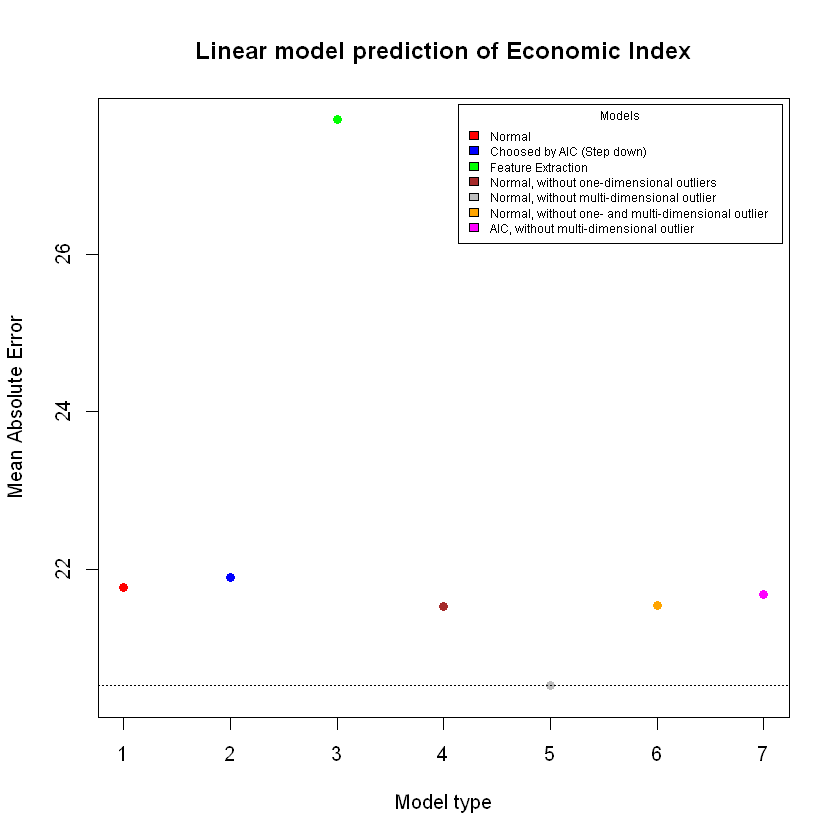

In [90]:
plot(x=0,xlim=c(1,length(wartosci)),ylim=c(round(min(wartosci)-0.1,1),round(max(wartosci),1)), 
     main = "Linear model prediction of Economic Index",ylab="Mean Absolute Error",xlab="Model type")
points(x=1, y=w_p,col="red",pch=19)
points(x=2, y=w_p_i,col="blue",pch=19)
points(x=3, y=w_a,col="green",pch=19)
points(x=4, y=w_o_j,col="brown",pch=19)
points(x=5, y=w_o_w,col="grey",pch=19)
points(x=6, y=w_o_j_i_w,col="orange",pch=19)
points(x=7, y=w_p_i_o_w,col="magenta",pch=19)

legend("topright", inset=.01, title="Models", ncol=1,
       cex = 0.6,
       c("Normal","Choosed by AIC (Step down)",
         "Feature Extraction",
         "Normal, without one-dimensional outliers",
         "Normal, without multi-dimensional outlier",
         "Normal, without one- and multi-dimensional outlier",
         "AIC, without multi-dimensional outlier"
        ),
       fill=c("red","blue","green",
              "brown","grey",
              "orange", "magenta"             ))
abline(h =min(wartosci),lty=15,col="black")

In [50]:
min(wartosci)

[1] 20.5157

Najlepszy okazał się model wytrenowany na powiększonym zbiorze z usuniętymi obserwacjami wielowymiarowych.

Przewiduje wartość indeksu ekonomicznego ze średnim błędem absolutnym 20.5157

In [51]:
head(model_odst_w$pred)

,pred,obs,rowIndex,intercept,Resample
,<dbl>,<int>,<int>,<lgl>,<chr>
1,2116.574,2120,1,TRUE,Fold1
2,2833.484,2853,5,TRUE,Fold1
3,2153.881,2178,9,TRUE,Fold1
4,2310.441,2306,13,TRUE,Fold1
5,2298.272,2297,15,TRUE,Fold1
6,2121.344,2088,17,TRUE,Fold1


In [52]:
data_frame=model_odst_w$pred
data_frame$intercept<-NULL
data_frame$rowIndex<-NULL
#write.csv(data_frame,"D:/STUDIA/ROK_II/Projekt/Predykcje_i błędy/IE_R_model_b_odst_w.csv", row.names = FALSE)

In [53]:
model_odst_w$residuals

NULL

In [54]:
eruption.res = resid(model_odst_w)

In [55]:
eruption.res

X1            X2            X3            X4            X5 
   3.71880438    2.20939315   -4.88704533  -21.96155215   17.67604087 
           X6            X7            X8            X9           X10 
  -8.00934578   11.06841133  -28.01549733   25.59693558   -0.55350304 
          X11           X12           X13           X14           X15 
  59.04220192  -29.47165220   -4.64548380   36.88831043   -2.23064536 
          X16           X17           X18           X19           X20 
 -20.10482197  -34.20487927  -14.91360514    9.28731534   39.52571122 
          X21           X22           X23           X24           X25 
 -26.69660836   16.78483382    4.20953921   -5.81601169  -35.28110690 
          X26           X27           X28           X29           X30 
  -4.05219411  -21.32124782   32.32341990  -62.63448552   22.23344816 
          X31           X32           X33           X34           X35 
 -12.71160504   28.40548875   22.49745610  -33.09718192  -13.49191926 
          X36           X37           X38           X39           X40 
   4.98350064   60.58046995  -24.45628150   22.49745610   -5.86225504 
          X41           X42           X43           X44           X45 
  30.49131716  -13.54487047   -2.84062696  -19.70672606   27.53190827 
          X46           X47           X48           X49           X50 
   5.53940485    7.42709135   61.58952586    3.44924563  -23.52844952 
          X51           X52           X53           X54           X55 
  35.08277184  -11.17859032   -9.12613293   -1.09154723    4.30969221 
          X56           X57           X58           X59           X60 
   5.71034235   -7.84929099   14.31070195    3.24646024  -10.12573746 
          X62           X63           X64           X65           X66 
  -1.03402847   11.23648128  -11.38797729  -62.63448552  -23.71219489 
          X67           X68           X70           X72           X73 
  24.34041621   12.95209510   -1.04585051   15.73087258   10.36192071 
          X74           X75           X77           X78           X79 
  -9.62817583    7.68839848   27.91796859  -53.14008655   32.46037777 
          X80           X81           X82           X83           X84 
 -28.87228942  -11.20811039   29.47231163   53.99650448  -35.63134102 
          X85           X86           X87           X88           X89 
  -4.07417861   14.89977002  -31.57851108  -15.44855562    9.27010851 
          X90           X91           X92           X93           X94 
   8.04886996    2.09896988  -32.75540727   -0.84831214  -11.51877570 
          X95           X96           X97           X98           X99 
  -9.51434364  -22.12621585    1.54211793   53.05214324   21.33668869 
         X100          X101          X102          X103          X104 
  34.91312073  -21.72695421   -0.65242177   60.02923102   -7.74547196 
         X105          X106          X107          X108          X109 
  28.63090770    8.20720778    4.09602004  -11.48525927   16.67459391 
         X110          X111          X112          X113          X114 
 -24.27338990   15.74805068   11.28944398   -4.64944839    4.31162231 
         X115          X116          X117          X118          X119 
  49.92095061  -16.38882452  -34.28418763  -26.71308246  -35.29892925 
         X120          X122          X123          X124          X125 
   8.58532996    1.78392193  -50.18573569  -19.01146213  -21.38835028 
         X126          X127          X128          X129          X130 
  53.99650448    6.89511682   -5.18991513    0.49679281   34.37873845 
         X131          X132          X133          X134          X135 
 -10.78564268   18.84500278  -14.40372779  -35.46155874  -29.93691257 
         X136          X137          X138          X139          X140 
  14.35188375  -12.31222340   14.19212037   18.04768151   14.09847129 
         X141          X142          X143          X144          X145 
 -30.88114527    5.38707322    9.10039717   -1.12204212    7.68080447 
         X146          X147        

In [91]:
model_odst_w2 <-lm(IE ~., data=cale_bez_odst_w)
# Summarize the results
print(model_odst_w2)



Call:
lm(formula = IE ~ ., data = cale_bez_odst_w)

Coefficients:
                    (Intercept)    WojewództwoKUJAWSKO-POMORSKIE  
                     -5410.0654                          10.8600  
           WojewództwoĹ\201Ă“DZKIE             WojewództwoĹšLÄ„SKIE  
                         9.8915                          10.6298  
    WojewództwoĹšWIÄ\230TOKRZYSKIE              WojewództwoLUBUSKIE  
                        -4.3126                           4.8521  
        WojewództwoMAĹ\201OPOLSKIE           WojewództwoMAZOWIECKIE  
                         9.2341                          11.4287  
            WojewództwoOPOLSKIE             WojewództwoPODLASKIE  
                        11.2129                           2.2853  
           WojewództwoPOMORSKIE  WojewództwoWARMIĹ\203SKO-MAZURSKIE  
                        -2.6009                          -5.8749  
       WojewództwoWIELKOPOLSKIE    WojewództwoZACHODNIOPOMORSKIE  
                         2.3233                   

In [52]:
library(broom)

Warning message:
"package 'broom' was built under R version 4.0.5"


In [93]:
model.diag.metrics <- augment(model_odst_w2)
head(model.diag.metrics)

.rownames,IE,Województwo,Data urodzenia,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,...,sm,nr,w,og,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2120,WIELKOPOLSKIE,2020,137,127,121,113,106,128,...,114,109,127,123,2116.281,3.718804,0.01535396,26.86940,7.058714e-06,0.1395169
2,1912,KUJAWSKO-POMORSKIE,2018,126,123,109,113,103,128,...,113,104,123,123,1909.791,2.209393,0.02078036,26.86950,3.409555e-06,0.0831183
3,2126,POMORSKIE,2020,126,120,110,107,102,124,...,103,102,122,117,2130.887,-4.887045,0.01837833,26.86929,1.468146e-05,-0.1836276
4,2089,KUJAWSKO-POMORSKIE,2020,133,111,104,110,99,114,...,106,101,112,112,2110.962,-21.961552,0.01396616,26.86435,2.232947e-04,-0.8233430
5,2853,ZACHODNIOPOMORSKIE,2020,125,115,91,95,101,124,...,102,118,123,109,2835.324,17.676041,0.02721031,26.86613,2.895506e-04,0.6671742
6,2088,PODLASKIE,2020,135,115,111,112,99,118,...,107,103,117,118,2096.009,-8.009346,0.01877269,26.86886,4.031255e-05,-0.3010065


In [51]:
library(ggfortify)


Warning message:
"package 'ggfortify' was built under R version 4.0.5"


In [53]:
autoplot(model_odst_w2)

ERROR: Error in autoplot(model_odst_w2): nie znaleziono obiektu 'model_odst_w2'


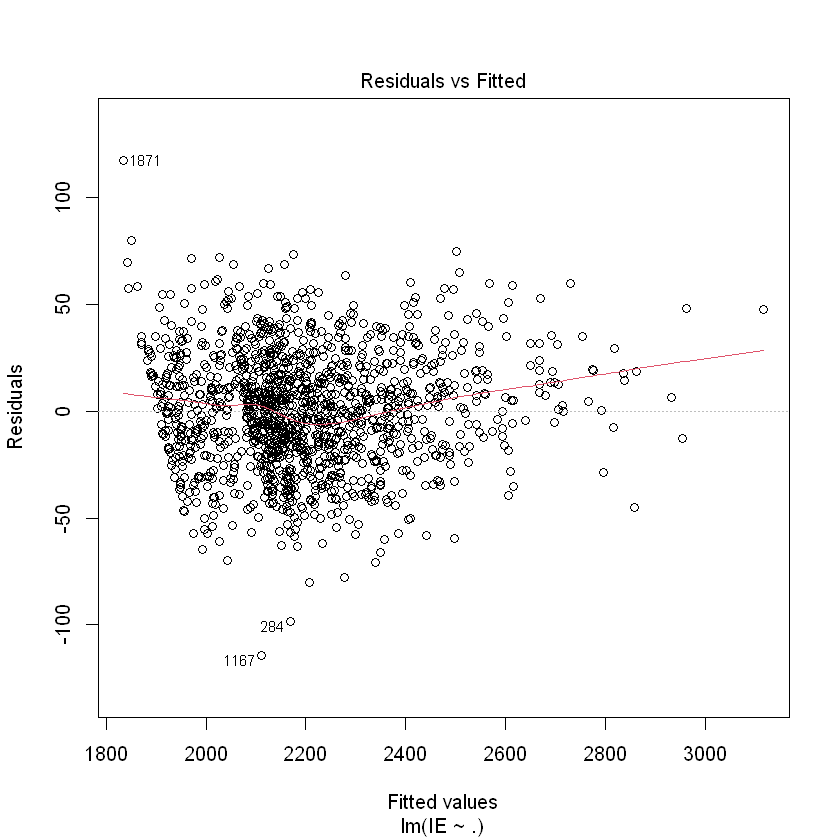

In [96]:
plot(model_odst_w2,1)

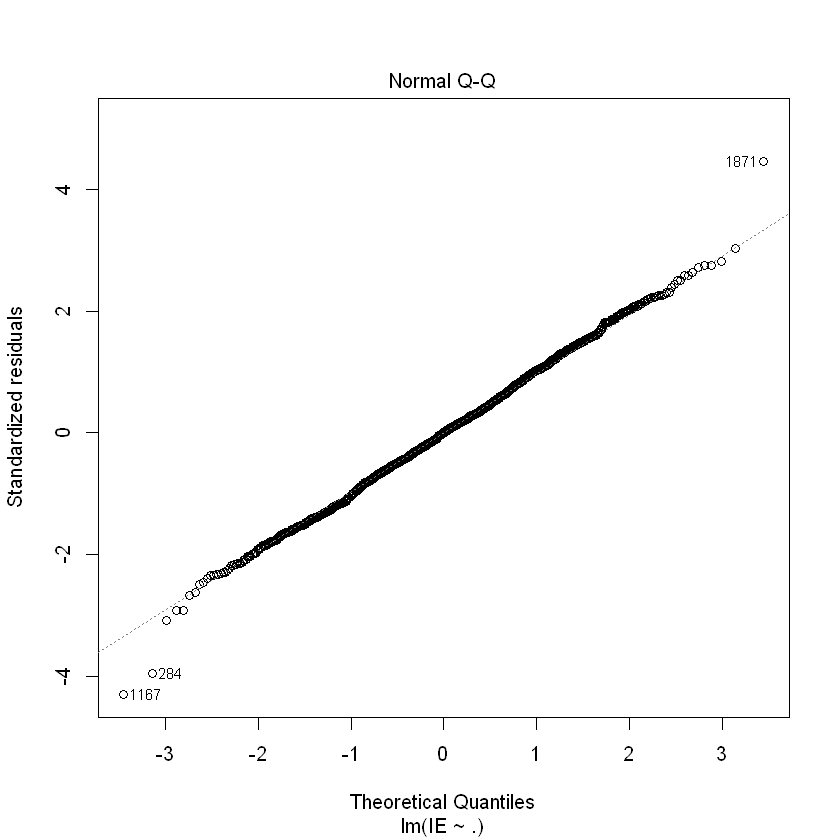

In [97]:
plot(model_odst_w2,2)

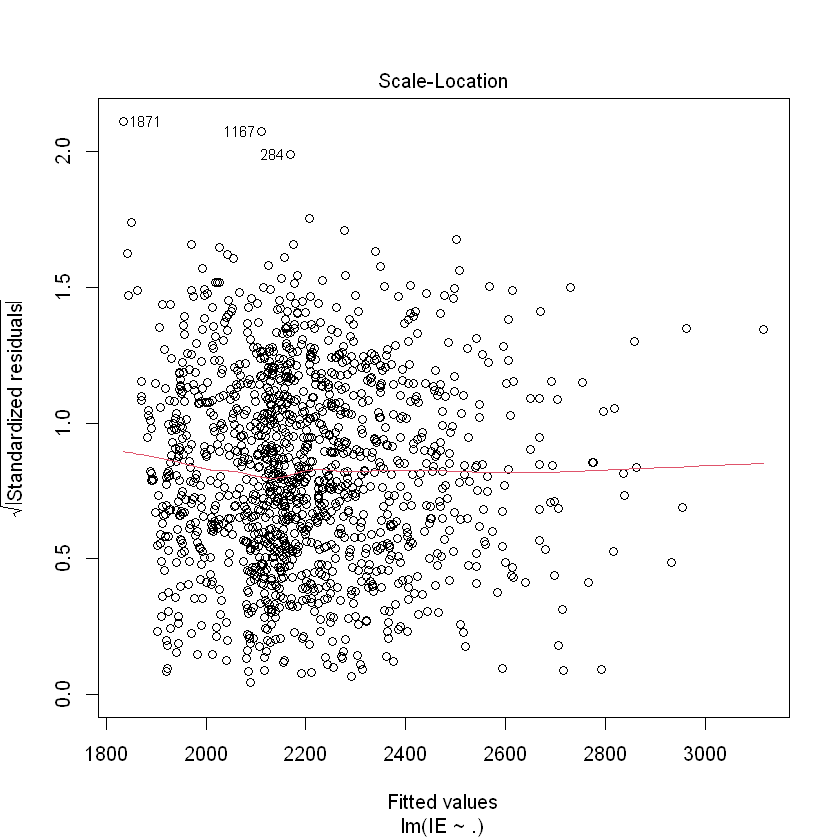

In [98]:
plot(model_odst_w2,3)

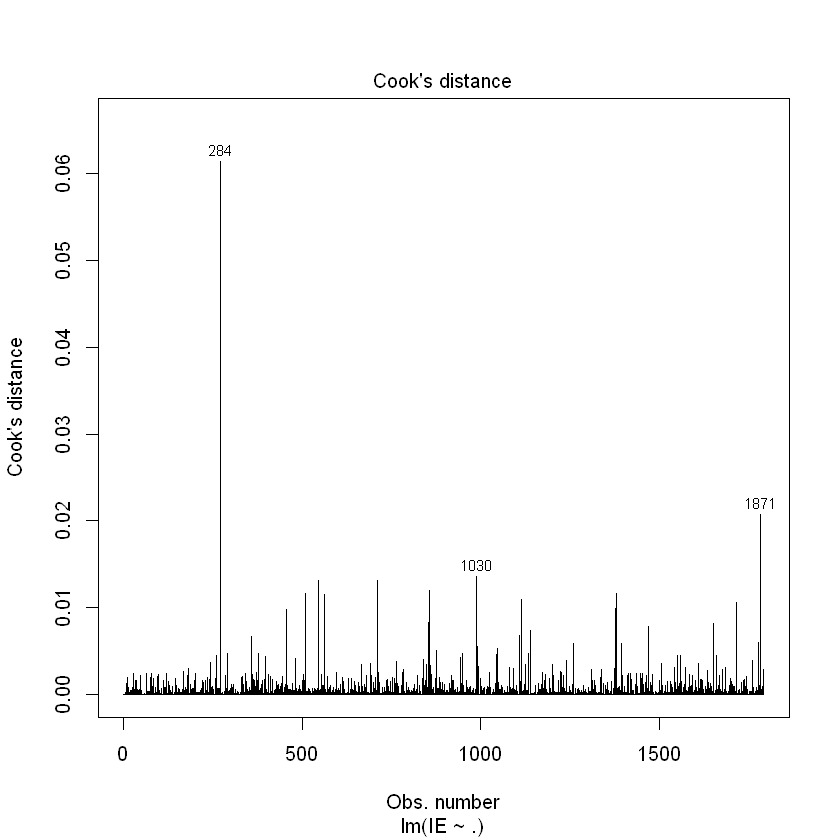

In [99]:
plot(model_odst_w2,4)

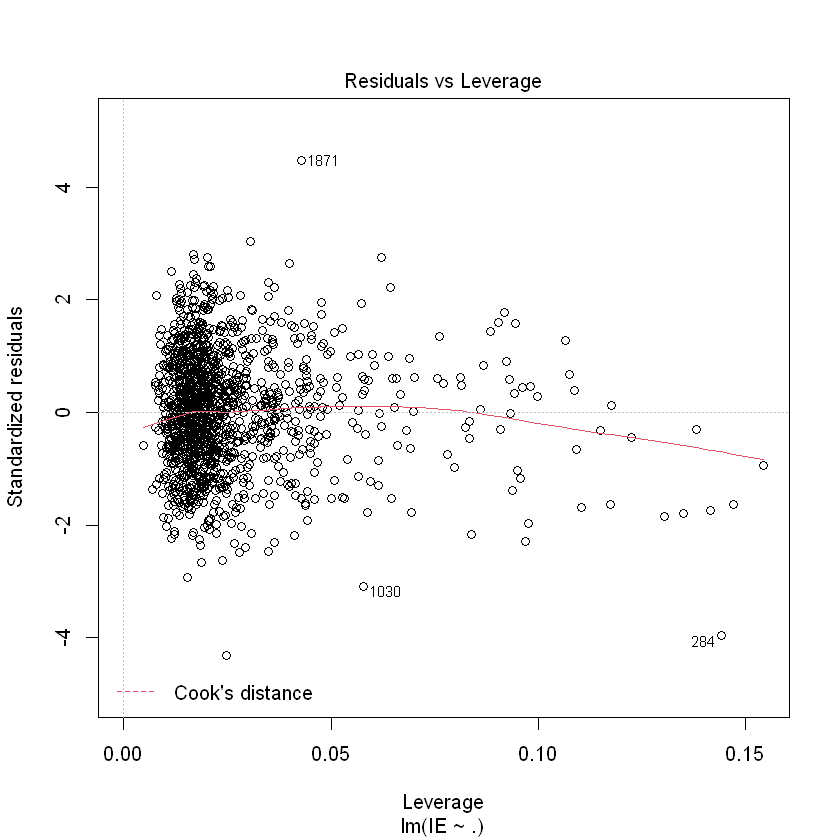

In [100]:
plot(model_odst_w2,5)

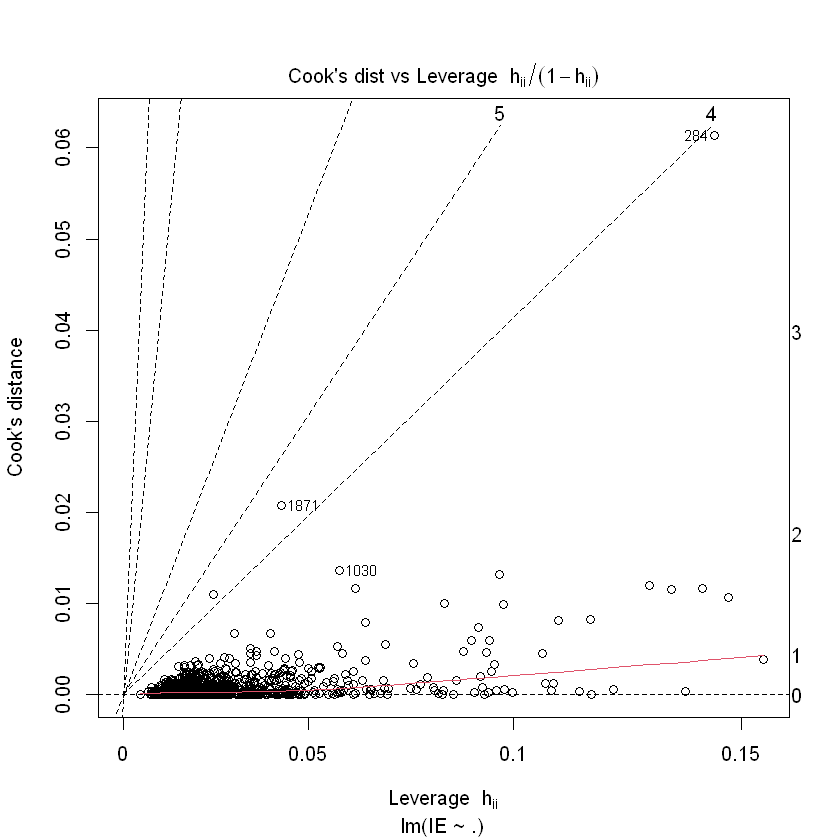

In [101]:
plot(model_odst_w2,6)

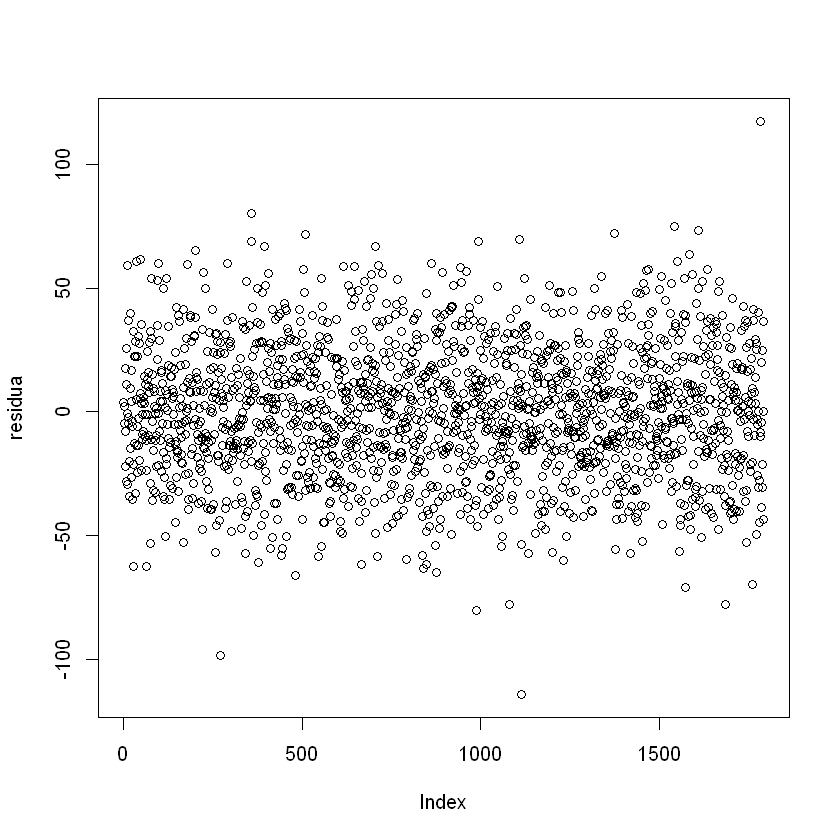

In [102]:
residua = resid(model_odst_w2)
plot(residua)

In [103]:
# Sprawdzam rozkład reszt modelu liniowego
shapiro.test(residua)


	Shapiro-Wilk normality test

data:  residua
W = 0.99832, p-value = 0.06796


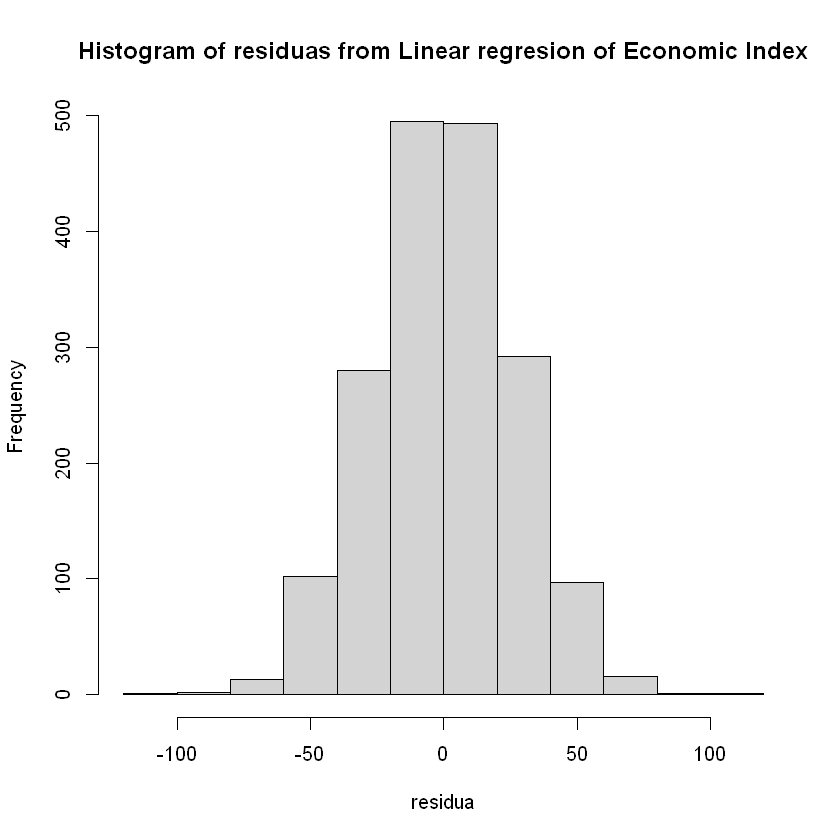

In [106]:
hist(residua,
main="Histogram of residuas from Linear regresion of Economic Index")

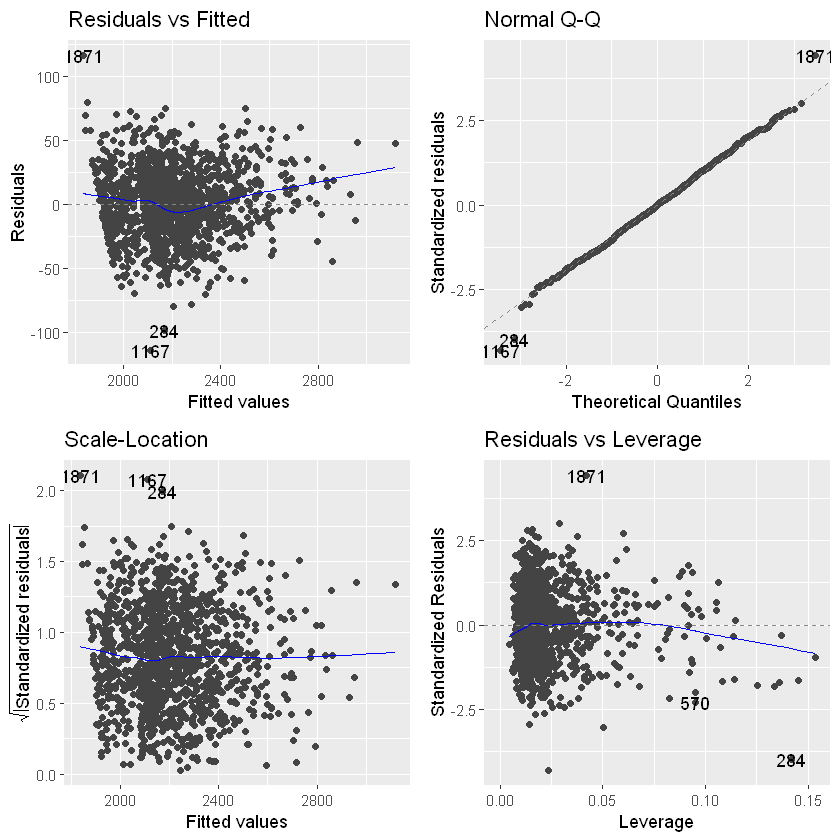

In [56]:
model_odst_w_istotny <- lm(IE ~ Województwo + `Data urodzenia` + `PI-POKR` + 
    Prc + Psm + Pnr + `PI-PLOD` + CRj + CRk + PP + OMC + `WH-KSOM` + 
    `WH-DLUG` + IP + `kg ml` + `kg tł` + `kg bi` + rc + sm + 
    nr + w + og, data=cale_bez_odst_w)
autoplot(model_odst_w_istotny)


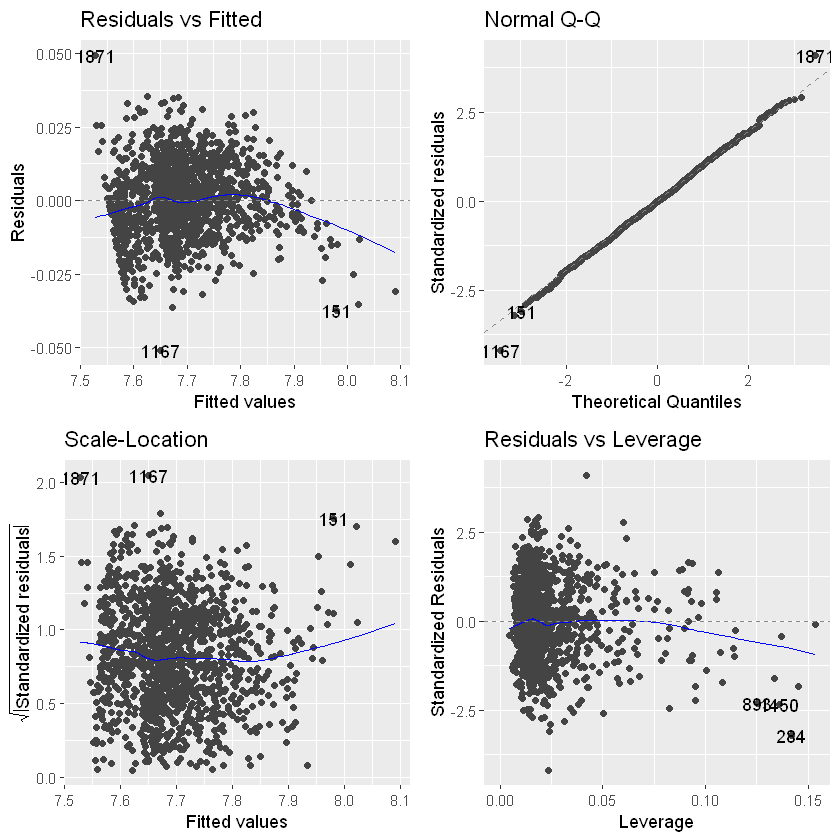

In [57]:
model_odst_w_istotny <- lm(log(IE) ~ Województwo + `Data urodzenia` + `PI-POKR` + 
    Prc + Psm + Pnr + `PI-PLOD` + CRj + CRk + PP + OMC + `WH-KSOM` + 
    `WH-DLUG` + IP + `kg ml` + `kg tł` + `kg bi` + rc + sm + 
    nr + w + og, data=cale_bez_odst_w)
autoplot(model_odst_w_istotny)


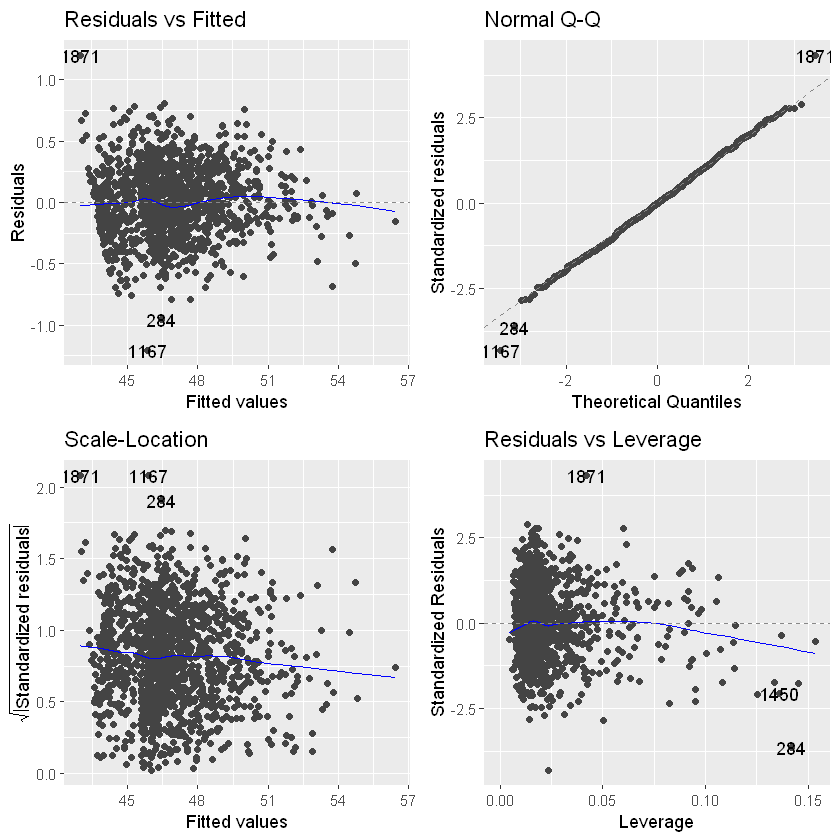

In [58]:
model_odst_w_istotny <- lm(sqrt(IE) ~ Województwo + `Data urodzenia` + `PI-POKR` + 
    Prc + Psm + Pnr + `PI-PLOD` + CRj + CRk + PP + OMC + `WH-KSOM` + 
    `WH-DLUG` + IP + `kg ml` + `kg tł` + `kg bi` + rc + sm + 
    nr + w + og, data=cale_bez_odst_w)
autoplot(model_odst_w_istotny)
